In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.style
matplotlib.style.use("seaborn")
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.rcParams["font.family"] = "Times New Roman"
import seaborn as sn
sn.color_palette("hls", 17)
import scipy.stats as st
import math
import dill
from pingouin import rcorr


In [2]:
import sys
import os
sys.path.append(os.path.join("..", "..", ".."))

from mika.kd.trend_analysis import *
from mika.utils.ICS import *
from mika.utils import Data

C:\Users\srandrad\Anaconda3\lib\site-packages\plotly\graph_objs\__init__.py:288: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
C:\Users\srandrad\Anaconda3\lib\site-packages\plotly\graph_objs\__init__.py:288: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
C:\Users\srandrad\Anaconda3\lib\site-packages\plotly\graph_objs\__init__.py:288: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
C:\Users\srandrad\Anaconda3\lib\site-packages\plotly\graph_objs\__init__.py:288: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(ipywidgets.__version__) >= LooseVersion("7.0.0"):
C:\Users\srandrad\AppData\Roamin

# Hazard Extraction and Analysis of Trends (HEAT): ICS-209-PLUS

In [3]:
figsize = (6, 4)
fontsize = 14
matrix_figsize = (8,9)
matrix_fontsize = 10

## Hazard Extraction

In [4]:
document_id_col = "Unique IDs"
extra_cols = ["CY","DISCOVERY_DATE", "START_YEAR", "REPORT_DOY", "DISCOVERY_DOY",
              "TOTAL_PERSONNEL", "TOTAL_AERIAL", "PCT_CONTAINED_COMPLETED"]
list_of_attributes = ["Combined Text"]
#change to jul-15 file, drop duplicates
file = os.path.join('topic_model_results', 'preprocessed_data_combined_text.csv')
ICS = Data()
ICS.load(file, preprocessed=True, id_col=document_id_col, text_columns=["Combined Text"], preprocessed_kwargs={'drop_short_docs':False, 'drop_duplicates':True})
#ICS = Topic_Model_plus(document_id_col=document_id_col, extra_cols=extra_cols, list_of_attributes=list_of_attributes, combine_cols=False)
#ICS.extract_preprocessed_data(file,  drop_short_docs=False, drop_duplicates=True)

..\..\..\mika\utils\Data.py:49: DtypeWarning: Columns (4,7) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data_df = pd.read_csv(filename)


In [5]:
preprocessed_df = ICS.data_df
hazard_file =  os.path.join('topic_model_results','hazard_interpretation_v1.xlsx')#os.path.join(os.path.dirname(os.getcwd()),'results','ICS_bertopic_combined_topics_Jun-23-2022','hazard_interpretation_v1.xlsx')
results_file = os.path.join('topic_model_results',"Combined Text Sentences_BERT_topics_modified.csv")#os.path.join(os.path.dirname(os.getcwd()),'results','ICS_bertopic_combined_topics_Jun-23-2022',"Combined Text_BERT_topics_modified.csv")

In [6]:
incident_file = os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir, os.pardir)),'data','ICS','summary_reports_cleaned.csv')
incident_summary_df = pd.read_csv(incident_file)
incident_summary_df = incident_summary_df.drop("Unnamed: 0", axis=1)
incident_summary_df = incident_summary_df.loc[incident_summary_df["START_YEAR"]>=2006].reset_index(drop=True)

fire_ids = incident_summary_df['INCIDENT_ID'].unique()
sitrep_ids = preprocessed_df['INCIDENT_ID'].unique()
incident_summary_df = incident_summary_df[incident_summary_df['INCIDENT_ID'].isin(sitrep_ids)].reset_index(drop=True)

C:\Users\srandrad\AppData\Local\Temp\1\ipykernel_9600\1388527731.py:2: DtypeWarning: Columns (7,13,18,19,36) have mixed types. Specify dtype option on import or set low_memory=False.
  incident_summary_df = pd.read_csv(incident_file)


In [7]:
hazard_interpretation_df = pd.read_excel(hazard_file, sheet_name='topic-focused')
categories = hazard_interpretation_df['Hazard Category'].tolist()
hazards = hazard_interpretation_df['Hazard name'].tolist()

In [8]:
# frequency, docs_per_hazard, hazard_words_per_doc, topics_per_doc, hazard_topics_per_doc = identify_docs_per_hazard(hazard_file, preprocessed_df, results_file, text_field='Combined Text', results_text_field='Combined Text Sentences_BERT_to', time_field="CY", id_field='Unique IDs', doc_topic_dist_field=None, topic_thresh=0.0)
# time_of_occurence_days, time_of_occurence_pct_contained, frequency, fires, frequency_fires = calc_ICS_metrics(docs_per_hazard, preprocessed_df, id_col="INCIDENT_ID", unique_ids_col='Unique IDs', rm_outliers=False)

In [9]:
# with open("OTTO_days_w_outliers.pkl", "wb") as f:
#     dill.dump(time_of_occurence_days, f)
# with open("OTTO_pct_w_outliers.pkl", "wb") as f:
#     dill.dump(time_of_occurence_pct_contained, f)
# with open("frequency_w_outliers.pkl", "wb") as f:
#     dill.dump(frequency, f)
# with open("fires_w_outliers.pkl", "wb") as f:
#     dill.dump(fires, f)
# with open("frequency_fires_w_outliers.pkl", "wb") as f:
#     dill.dump(frequency_fires, f)
# with open("docs_per_hazard_w_outliers.pkl", "wb") as f:
#     dill.dump(docs_per_hazard, f)
# with open("hazard_words_per_doc_w_outliers.pkl", "wb") as f:
#     dill.dump(hazard_words_per_doc, f)
# with open("topics_per_doc_w_outliers.pkl", "wb") as f:
#     dill.dump(topics_per_doc, f)
# with open("hazard_topics_per_doc_w_outliers.pkl", "wb") as f:
#     dill.dump(hazard_topics_per_doc, f)

In [10]:
with open("OTTO_days_w_outliers.pkl", "rb") as f:
    time_of_occurence_days = dill.load(f)
with open("OTTO_pct_w_outliers.pkl", "rb") as f:
    time_of_occurence_pct_contained = dill.load(f)
with open("frequency_w_outliers.pkl", "rb") as f:
    frequency = dill.load(f)
with open("fires_w_outliers.pkl", "rb") as f:
    fires = dill.load(f)
with open("frequency_fires_w_outliers.pkl", "rb") as f:
    frequency_fires = dill.load(f)
with open("docs_per_hazard_w_outliers.pkl", "rb") as f:
    docs_per_hazard = dill.load(f)
with open("hazard_words_per_doc_w_outliers.pkl", "rb") as f:
    hazard_words_per_doc = dill.load(f)
with open("topics_per_doc_w_outliers.pkl", "rb") as f:
    topics_per_doc = dill.load(f)
with open("hazard_topics_per_doc_w_outliers.pkl", "rb") as f:
    hazard_topics_per_doc = dill.load(f)

In [11]:
_ = hazard_accuracy(docs_per_hazard, num=15, results_path=os.path.join('topic_model_results'), hazard_words_per_doc=hazard_words_per_doc, preprocessed_df=preprocessed_df, text_col='Combined Text', id_col='Unique IDs')

In [12]:
results_path=os.path.join('topic_model_results')

In [13]:
metrics, true, pred = calc_classification_metrics(os.path.join('topic_model_results', 'labeled_ICS.csv'), docs_per_hazard=docs_per_hazard, id_col='Unique IDs')

In [14]:
test_metrics, _, _ = calc_classification_metrics(os.path.join('topic_model_results', 'labeled_ICS_test_set_full.csv'), docs_per_hazard=docs_per_hazard, id_col='Unique IDs')

In [15]:
_ = examine_hazard_extraction_mismatches(preprocessed_df, true, pred, hazards, hazard_words_per_doc=hazard_words_per_doc, topics_per_doc=topics_per_doc, hazard_topics_per_doc=hazard_topics_per_doc, results_path=results_path, id_col='Unique IDs', text_col='Combined Text')

High precision -> only counting instances of the hazard, not over counting


Low recall -> under counting, there are instances with the hazard that are not counted

In [16]:
years = preprocessed_df["CY"].unique()
years.sort()
table_data = create_primary_results_table(time_of_occurence_days, time_of_occurence_pct_contained, frequency, frequency_fires, preprocessed_df, categories, hazards, years, interval=True)
table = pd.DataFrame(table_data).sort_values('Hazard Category').reset_index(drop=True)
hazards_sorted = table['Hazard Name'].tolist()

In [17]:
hazard_extraction = pd.concat([metrics,test_metrics],axis=1,keys=['Validation','Test']).reindex(hazards_sorted)
hazard_extraction

Validation                                     Test  \
                         Recall Precision     F1 Accuracy Support Recall   
Hazardous Terrain         0.883     0.938  0.910    0.940     171  0.859   
Ecological Resources      0.621     0.900  0.735    0.948      58  0.667   
Thunderstorms             0.875     1.000  0.933    0.992      32  0.857   
Wind                      0.840     0.988  0.908    0.968      94  0.795   
Dry Weather               0.791     0.973  0.873    0.958      91  0.732   
Rain                      0.872     0.872  0.872    0.980      39  0.800   
Smoke                     0.943     0.847  0.893    0.976      53  0.929   
Evacuations               0.885     0.958  0.920    0.984      52  0.909   
Injury                    0.786     1.000  0.880    0.994      14  0.700   
Resource Shortage         0.776     0.826  0.800    0.962      49  0.778   
Road Closures             0.792     0.704  0.745    0.948      48  0.760   
Command Transition        0.902     0.965  0.932    0.984      61  0.758   
Inaccurate Mapping        0.824     0.933  0.875    0.992      17  0.913   
Aerial Grounding          1.000     0.765  0.867    0.992      13  0.625   
Military Base             0.667     0.857  0.750    0.992       9  0.800   
Cultural Resources        0.810     0.810  0.810    0.956      58  0.729   
Law Violations            1.000     1.000  1.000    1.000       3  1.000   
Infrastructure            0.714     0.921  0.805    0.966      49  0.725   
Livestock                 0.842     0.842  0.842    0.988      19  0.765   

                                                        
                     Precision     F1 Accuracy Support  
Hazardous Terrain        0.907  0.882    0.912     192  
Ecological Resources     0.881  0.759    0.934      78  
Thunderstorms            0.818  0.837    0.986      21  
Wind                     0.912  0.849    0.956      78  
Dry Weather              0.938  0.822    0.948      82  
Rain                     0.800  0.800    0.976      30  
Smoke                    0.796  0.857    0.974      42  
Evacuations              0.930  0.920    0.986      44  
Injury                   1.000  0.824    0.994      10  
Resource Shortage        0.651  0.709    0.954      36  
Road Closures            0.613  0.679    0.928      50  
Command Transition       0.833  0.794    0.948      66  
Inaccurate Mapping       0.840  0.875    0.988      23  
Aerial Grounding         0.833  0.714    0.992       8  
Military Base            0.667  0.727    0.994       5  
Cultural Resources       0.827  0.775    0.950      59  
Law Violations           0.667  0.800    0.998       2  
Infrastructure           0.829  0.773    0.966      40  
Livestock                0.619  0.684    0.976      17

In [18]:
print(hazard_extraction.to_latex())

\begin{tabular}{lrrrrrrrrrr}
\toprule
{} & \multicolumn{5}{l}{Validation} & \multicolumn{5}{l}{Test} \\
{} &     Recall & Precision &     F1 & Accuracy & Support & Recall & Precision &     F1 & Accuracy & Support \\
\midrule
Hazardous Terrain    &      0.883 &     0.938 &  0.910 &    0.940 &     171 &  0.859 &     0.907 &  0.882 &    0.912 &     192 \\
Ecological Resources &      0.621 &     0.900 &  0.735 &    0.948 &      58 &  0.667 &     0.881 &  0.759 &    0.934 &      78 \\
Thunderstorms        &      0.875 &     1.000 &  0.933 &    0.992 &      32 &  0.857 &     0.818 &  0.837 &    0.986 &      21 \\
Wind                 &      0.840 &     0.988 &  0.908 &    0.968 &      94 &  0.795 &     0.912 &  0.849 &    0.956 &      78 \\
Dry Weather          &      0.791 &     0.973 &  0.873 &    0.958 &      91 &  0.732 &     0.938 &  0.822 &    0.948 &      82 \\
Rain                 &      0.872 &     0.872 &  0.872 &    0.980 &      39 &  0.800 &     0.800 &  0.800 &    0.976 &      3

In [19]:
word_frequencies = get_word_frequencies(hazard_words_per_doc, hazards_sorted)

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\srandrad\Anaconda3\lib\site-packages\wordcloud\wordcloud.py:501: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, fo

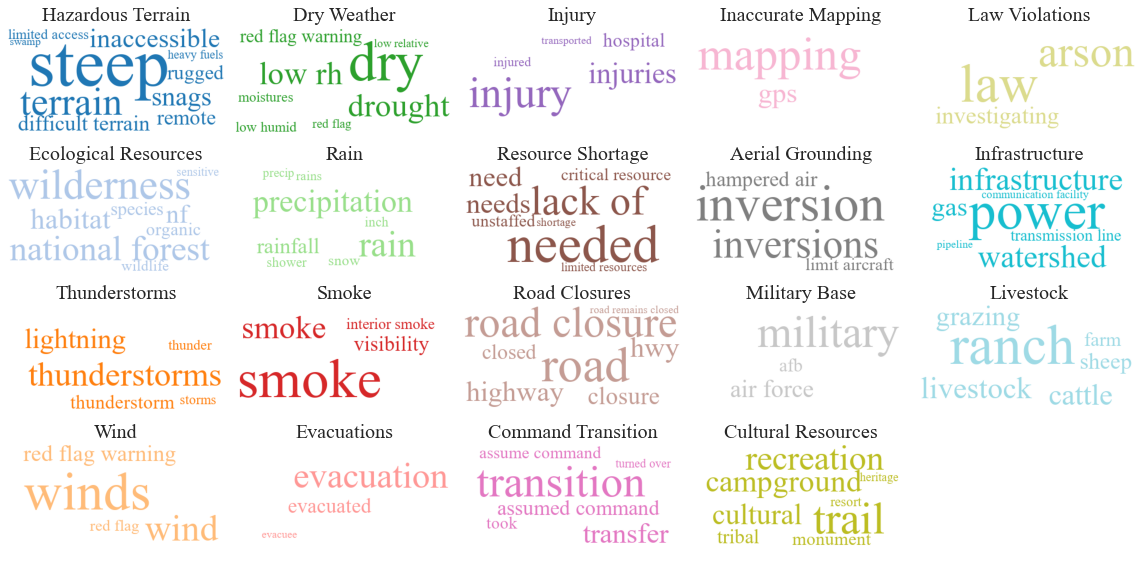

In [20]:
build_word_clouds(word_frequencies, nrows=4, ncols=5, figsize=(16, 8), cmap=None, save=True, save_path=os.path.join('topic_model_results',''), fontsize=20)

## Primary Analysis: Hazard Metrics

In [21]:
fires = {hazard: fires[hazard] for hazard in hazards_sorted}

In [22]:
severity_total, severity_table = calc_severity(fires, incident_summary_df ,rm_all_outliers=False, rm_severity_outliers=False)
#severity_table

In [23]:
severity_table = severity_table.set_index('Hazard').reindex(hazards_sorted).reset_index()

In [24]:
severity_accross_all_incidents = []; injuries_all = []; fatalities_all = []; str_dam_all = []; str_des_all = []
for i in range(len(incident_summary_df)):
    severity = int(incident_summary_df.iloc[i]["STR_DESTROYED_TOTAL"]) + int(incident_summary_df.iloc[i]["STR_DAMAGED_TOTAL"])+ int(incident_summary_df.iloc[i]["INJURIES_TOTAL"])+ int(incident_summary_df.iloc[i]["FATALITIES"])
    severity_accross_all_incidents.append(severity)
    injuries_all.append(int(incident_summary_df.iloc[i]["INJURIES_TOTAL"])); fatalities_all.append(int(incident_summary_df.iloc[i]["FATALITIES"]))
    str_dam_all.append(int(incident_summary_df.iloc[i]["STR_DAMAGED_TOTAL"])); str_des_all.append(int(incident_summary_df.iloc[i]["STR_DESTROYED_TOTAL"]))
#print(len(severity_accross_all_incidents))
#severity_accross_all_incidents = remove_outliers(severity_accross_all_incidents)

In [25]:
total_incidents_df = pd.DataFrame({"Hazard Category": ['Total Reports'],
                                  "Hazard Name": [''],
                                  "OTTO %":[''],
                                   "Total Fire Frequency":[str(len(incident_summary_df))],
                                  "Rate":[str(round(np.average(incident_summary_df['START_YEAR'].value_counts().values),1))+"+-"+str(round(np.std(incident_summary_df['START_YEAR'].value_counts().values),1))],#len(incident_summary_df)/len(years))],
                                  "Fatalities":[str(round(np.average(fatalities_all),1))+"+-"+str(round(np.std(fatalities_all),1))],
                                  "Injuries":[str(round(np.average(injuries_all),1))+"+-"+str(round(np.std(injuries_all),1))],
                                  "Structures Damaged":[str(round(np.average(str_dam_all),1))+"+-"+str(round(np.std(str_dam_all),1))],
                                  "Structures Destroyed":[str(round(np.average(str_des_all),1))+"+-"+str(round(np.std(str_des_all),1))],
                                  "Severity":[str(round(np.average(severity_accross_all_incidents),1))+"+-"+str(round(np.std(severity_accross_all_incidents),1))]},
                                 index =['Total Reports'])

In [26]:
values = ['Fatalities', 'Injuries', 'Structures Damaged', 'Structures Destroyed']
for value in values:
    table[value] = severity_table['Average '+value].astype(str) + "+-" + severity_table['std dev '+value].astype(str)

In [27]:
table['Severity'] = severity_table['formatted']
columns = ['Hazard Category', 'Hazard Name', 'OTTO %', 'Total Fire Frequency', 'Rate'] + values +['Severity']
table = table[columns]
table = table.set_index('Hazard Category')#.drop(['Hazard Category'], axis=1)
table = table.append(total_incidents_df.drop(['Hazard Category'], axis=1))
display(table)

Hazard Name      OTTO %  \
Environment                  Hazardous Terrain  53.3+-36.5   
Environment               Ecological Resources  46.8+-35.1   
Environment                      Thunderstorms  55.1+-35.8   
Environment                               Wind  51.8+-36.3   
Environment                        Dry Weather  55.4+-36.3   
Environment                               Rain  64.4+-37.7   
Environment                              Smoke  48.6+-37.5   
Mission                            Evacuations  36.0+-31.0   
Mission                                 Injury  56.0+-34.3   
Mission                      Resource Shortage  40.2+-33.7   
Mission                          Road Closures  44.5+-34.6   
Mission                     Command Transition  60.8+-38.2   
Mission                     Inaccurate Mapping  65.8+-34.3   
Mission                       Aerial Grounding  32.1+-26.7   
Wildland Urban Interface         Military Base  58.0+-35.7   
Wildland Urban Interface    Cultural Resources  44.9+-35.0   
Wildland Urban Interface        Law Violations  78.2+-31.3   
Wildland Urban Interface        Infrastructure  50.2+-35.0   
Wildland Urban Interface             Livestock  40.2+-34.9   
Total Reports                                                

                         Total Fire Frequency          Rate Fatalities  \
Environment                              2900  322.2+-120.9   0.0+-0.5   
Environment                               792    88.0+-29.2   0.0+-0.4   
Environment                              1127   125.2+-51.2   0.0+-0.5   
Environment                              2950  327.8+-120.2   0.0+-0.5   
Environment                              2171   241.2+-92.6   0.0+-0.5   
Environment                              1696   188.4+-42.7   0.0+-0.5   
Environment                              1281   142.3+-33.4   0.0+-0.5   
Mission                                  1296   144.0+-58.4   0.1+-0.7   
Mission                                   783    87.0+-31.7   0.1+-0.5   
Mission                                  1229   136.6+-58.3   0.0+-0.6   
Mission                                  1726   191.8+-67.6   0.0+-0.4   
Mission                                  1868   207.6+-55.0   0.0+-0.6   
Mission                                  1383   153.7+-47.5   0.0+-0.2   
Mission                                   149     16.6+-7.6   0.1+-0.8   
Wildland Urban Interface                   83      9.2+-3.5   0.1+-0.5   
Wildland Urban Interface                  865    96.1+-29.7   0.0+-0.4   
Wildland Urban Interface                  328    36.4+-21.4   0.1+-0.6   
Wildland Urban Interface                  877    97.4+-35.4   0.1+-0.8   
Wildland Urban Interface                  530    58.9+-31.2   0.1+-0.5   
Total Reports                            8991  999.0+-312.3   0.0+-0.3   

                          Injuries Structures Damaged Structures Destroyed  \
Environment               1.4+-3.9          0.8+-10.1            4.5+-41.1   
Environment               2.5+-5.7          1.5+-18.4            6.4+-34.3   
Environment               1.8+-4.8          1.1+-15.6            5.0+-33.6   
Environment               1.3+-3.9          1.1+-12.1            6.2+-53.2   
Environment               1.5+-4.2          1.4+-13.8            7.6+-61.6   
Environment               1.2+-3.4          1.2+-14.3            5.0+-49.5   
Environment               1.8+-5.0          1.4+-15.3            7.6+-58.9   
Mission                   2.5+-5.5          2.5+-18.0           14.6+-80.1   
Mission                   3.9+-6.2          1.9+-18.5           14.1+-95.0   
Mission                   2.4+-5.4          1.5+-15.5            8.4+-60.0   
Mission                   2.0+-4.8          1.9+-16.0            9.9+-69.5   
Mission                   2.2+-4.9          1.7+-15.4            9.1+-66.7   
Mission                   1.8+-4.6           1.0+-9.6            5.7+-32.4   
Mission                   6.3+-9.7          5.3+-40.2           10.4+-45.3   
Wildlan

In [28]:
print(table.to_latex())

\begin{tabular}{llllllllll}
\toprule
{} &           Hazard Name &      OTTO \% & Total Fire Frequency &          Rate & Fatalities &  Injuries & Structures Damaged & Structures Destroyed &     Severity \\
\midrule
Environment              &     Hazardous Terrain &  53.3+-36.5 &                 2900 &  322.2+-120.9 &   0.0+-0.5 &  1.4+-3.9 &          0.8+-10.1 &            4.5+-41.1 &    6.8+-46.4 \\
Environment              &  Ecological Resources &  46.8+-35.1 &                  792 &    88.0+-29.2 &   0.0+-0.4 &  2.5+-5.7 &          1.5+-18.4 &            6.4+-34.3 &   10.5+-50.0 \\
Environment              &         Thunderstorms &  55.1+-35.8 &                 1127 &   125.2+-51.2 &   0.0+-0.5 &  1.8+-4.8 &          1.1+-15.6 &            5.0+-33.6 &    8.0+-45.8 \\
Environment              &                  Wind &  51.8+-36.3 &                 2950 &  327.8+-120.2 &   0.0+-0.5 &  1.3+-3.9 &          1.1+-12.1 &            6.2+-53.2 &    8.6+-60.1 \\
Environment              &    

In [29]:
avg_injuries = round(np.average(injuries_all))
avg_fatalities = round(np.average(fatalities_all))
avg_des = round(np.average(str_des_all))
avg_dam = round(np.average(str_dam_all))
avg_df = pd.DataFrame({"Total Avg Injuries":[avg_injuries for hazard in hazards],
                     "Total Avg Fatalities":[avg_fatalities for hazard in hazards],
                     "Total Avg Str Dam":[avg_dam for hazard in hazards],
                     "Total Avg Str Des":[avg_des for hazard in hazards]})
severity_results = pd.DataFrame({""})

In [30]:
ICS_results = pd.concat([table.drop(['Total Reports']).reset_index(drop=True), severity_table, avg_df], axis=1)
#ICS_results.to_csv(os.path.join(os.path.dirname(os.getcwd()),'results','ICS_hazards.csv'))

### Risk Matrix of Hazards (rate by severity)

In [31]:
matplotlib.style.use("default")
plt.rcParams["font.family"] = "Times New Roman"

In [32]:
#ICS_results = pd.read_csv(os.path.join(os.path.dirname(os.getcwd()),'results','ICS_hazards.csv'))

In [33]:
ICS_results.index = ICS_results['Hazard Name']

In [34]:
severities = get_ICS_severity_FAA(ICS_results, hazards)

In [35]:
rates = {hazard:float(table[table['Hazard Name']==hazard]['Rate'].values[0].split("+-")[0]) for hazard in hazards}
rates_FAA = get_likelihood_ICS_FAA(rates)

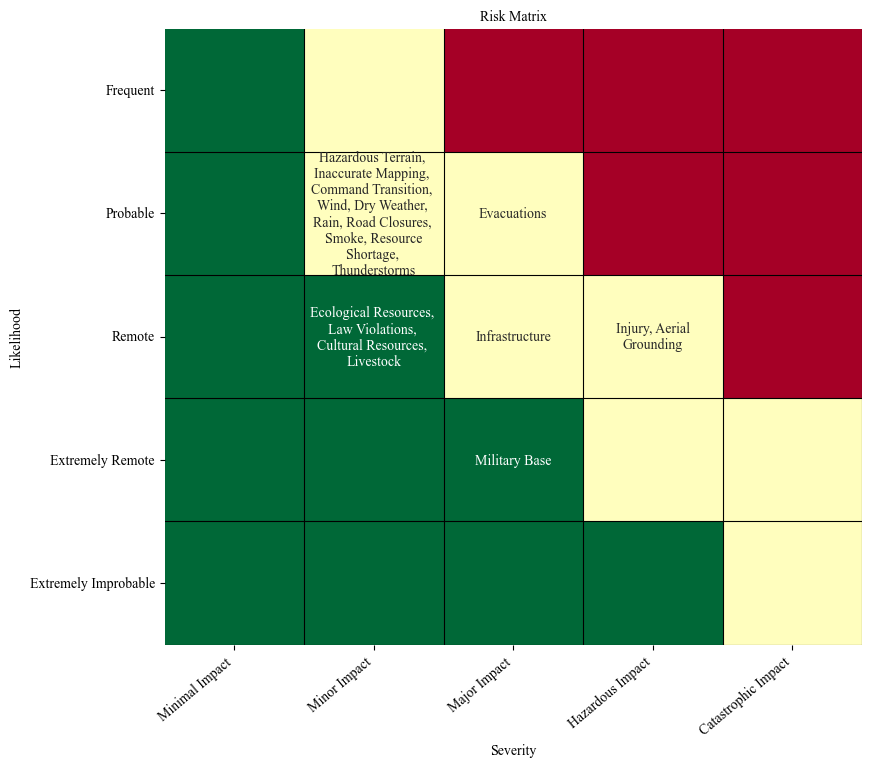

In [36]:
plot_risk_matrix(rates_FAA, severities, figsize=(9,8), results_path=os.path.join('risk_matrix'), save=True, max_chars=22, fontsize=10)

In [37]:
likelihoods = get_likelihood_ICS_USFS(rates)
severities = get_ICS_severity_USFS(ICS_results, hazards)

In [38]:
severities

{'Evacuations': 'Critical',
 'Hazardous Terrain': 'Marginal',
 'Inaccurate Mapping': 'Marginal',
 'Ecological Resources': 'Marginal',
 'Command Transition': 'Marginal',
 'Wind': 'Marginal',
 'Dry Weather': 'Marginal',
 'Rain': 'Marginal',
 'Law Violations': 'Marginal',
 'Road Closures': 'Marginal',
 'Smoke': 'Marginal',
 'Military Base': 'Critical',
 'Cultural Resources': 'Marginal',
 'Resource Shortage': 'Marginal',
 'Thunderstorms': 'Marginal',
 'Infrastructure': 'Critical',
 'Injury': 'Critical',
 'Livestock': 'Marginal',
 'Aerial Grounding': 'Critical'}

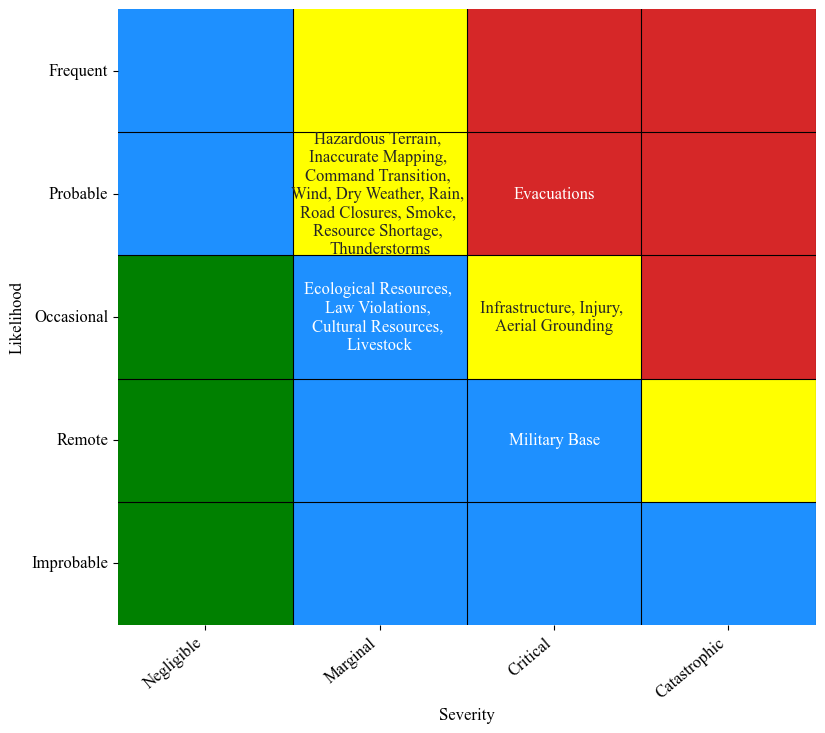

In [39]:
plot_USFS_risk_matrix(likelihoods, severities, figsize=(9,8), results_path=os.path.join('risk_matrix'), save=True, max_chars=24,fontsize=12)#fontsize)

#### Graphic Analysis: Time Series
- Hazard Metrics: OTTO, Severity, Frequency 
- Predictors

### Hazard Metrics Time Series
frequency, OTTO in pct containment, severity

In [40]:
matplotlib.style.use("seaborn")
plt.rcParams["font.family"] = "Times New Roman"
categories = table.index[:-1]#['Hazard Category'][:-1].index
metric_data = [time_of_occurence_days, time_of_occurence_pct_contained, frequency, frequency_fires]
time_of_occurence_days = {hazard: time_of_occurence_days[hazard] for hazard in hazards_sorted}
time_of_occurence_pct_contained = {hazard: time_of_occurence_pct_contained[hazard] for hazard in hazards_sorted}
frequency = {hazard: frequency[hazard] for hazard in hazards_sorted}
frequency_fires = {hazard: frequency_fires[hazard] for hazard in hazards_sorted}

In [41]:
categories

Index(['Environment', 'Environment', 'Environment', 'Environment',
       'Environment', 'Environment', 'Environment', 'Mission', 'Mission',
       'Mission', 'Mission', 'Mission', 'Mission', 'Mission',
       'Wildland Urban Interface', 'Wildland Urban Interface',
       'Wildland Urban Interface', 'Wildland Urban Interface',
       'Wildland Urban Interface'],
      dtype='object')

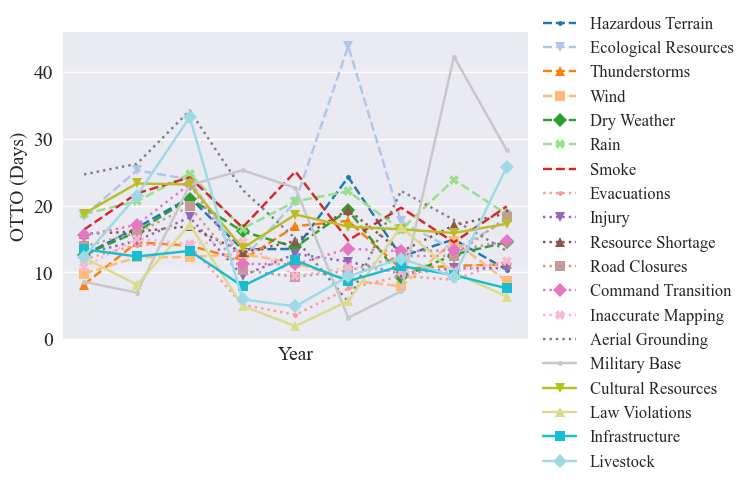

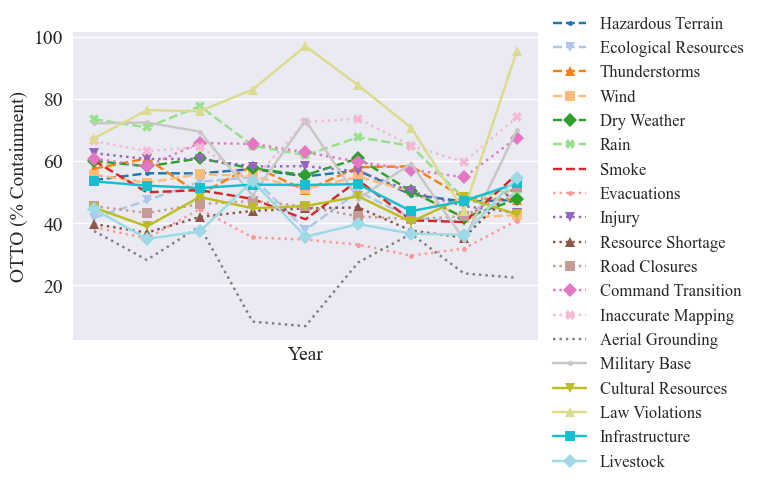

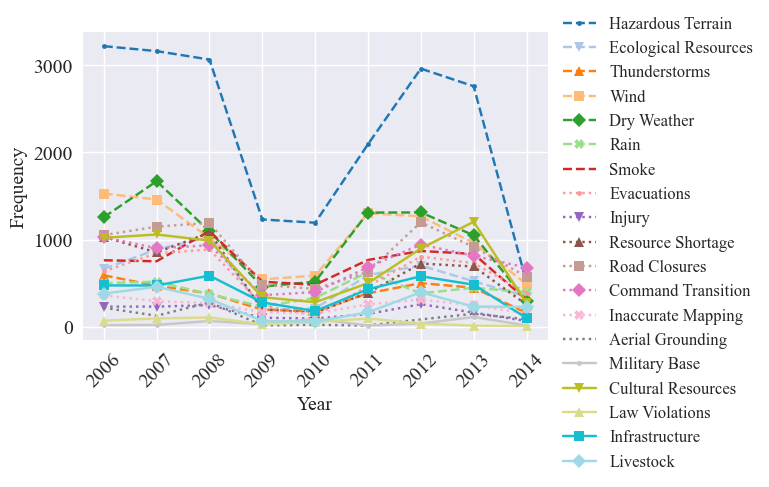

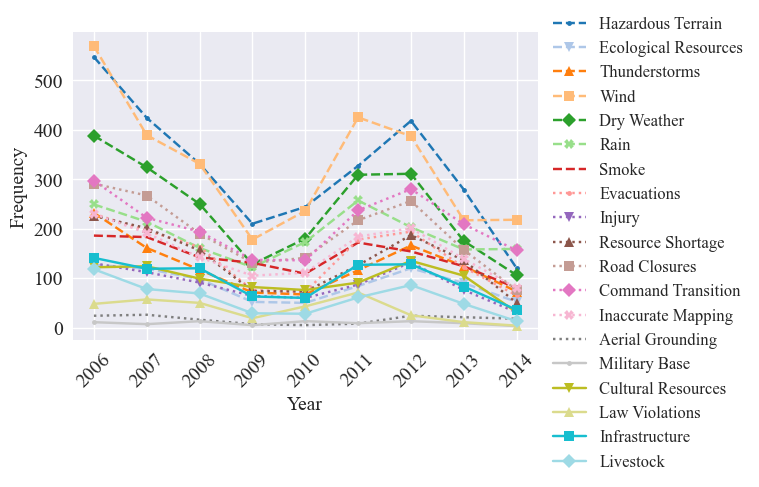

In [42]:
#sort by category? 
graph_ICS_time_series(time_of_occurence_days, time_of_occurence_pct_contained, frequency, frequency_fires, hazards, categories, save=True, std_dev=False, results_path=os.getcwd(), figsize=figsize, fontsize=fontsize, titles=False)

In [43]:
frequencies_fire = {hazard: [frequency_fires[hazard][year] for year in frequency_fires[hazard]] for hazard in frequency_fires}
fire_freqs_scaled = {hazard: minmax_scale(frequencies_fire[hazard]) for hazard in frequencies_fire}

### Predictor Time Series
- fire characteristics
- operations
- intensity

In [44]:
def combine_predictors(predictors=[], scale=True):
    max_weight = 1/len(predictors)
    num_values = len(predictors[-1])
    if scale: 
        variable_weights = [minmax_scale(p) for p in predictors]
    else:
        variable_weights = predictors
    combined_vars = [[max_weight*var_weight for var_weight in var_weight_list] for var_weight_list in variable_weights]
    combined_vars = [sum([combined_vars[var][i] for var in range(len(combined_vars))]) for i in range(num_values)]
    return combined_vars

In [45]:
combined_predictors = pd.DataFrame()

#### Fire Characteristics
examining trends in frequency, acres burned, and the number of days a fire burns on average per year. Potentially add FSR (WF_MAX_FSR), number of complexes (COMPLEX), evacuations (EVACUATION_REPORTED)


In [46]:
fire_trends_cols = ["FINAL_ACRES", "FOD_DISCOVERY_DOY", "FOD_CONTAIN_DOY", "START_YEAR"]
fire_trends_df = incident_summary_df[fire_trends_cols]

In [47]:
counts = fire_trends_df["START_YEAR"].value_counts()
count = {int(year):counts[year] for year in counts.index.sort_values()}

In [48]:
years = count.keys()

In [49]:
average_days_burning = {}
total_days_burning = {}
total_acres = {}
average_acres = {}
for year in years:
    temp_df = fire_trends_df.loc[fire_trends_df['START_YEAR']==year]
    list_of_days_burning = [temp_df.iloc[i]["FOD_CONTAIN_DOY"]-temp_df.iloc[i]['FOD_DISCOVERY_DOY'] for i in range(len(temp_df.dropna(subset=['FOD_DISCOVERY_DOY', "FOD_CONTAIN_DOY"]).reset_index(drop=True)))]
    average_days_burning[year] = np.average(list_of_days_burning)
    total_days_burning[year] = np.sum(list_of_days_burning)
    list_of_acres = temp_df['FINAL_ACRES'].dropna().tolist()
    average_acres[year] = np.average(list_of_acres)
    total_acres[year] = np.sum(list_of_acres)
#print(total_days_burning)

In [50]:
fire_predictors = [total_acres.values(), counts, total_days_burning.values()]

In [51]:
fire_predictors = [total_acres.values(), counts, total_days_burning.values()]
combined_predictors['Fire Characteristics'] = combine_predictors(fire_predictors)
combined_predictors.index = years

#### Graphs

In [52]:
av_acres = average_acres.values()
av_days_burn = average_days_burning.values()
count = count.values()
freq_scaled = minmax_scale(count)
av_days_burn_scaled = minmax_scale(av_days_burn)
av_acres_scaled = minmax_scale(av_acres)

total_days_burn = total_days_burning.values()
total_acre = total_acres.values()
total_days_burn_scaled = minmax_scale(total_days_burn)
total_acres_scaled = minmax_scale(total_acre)

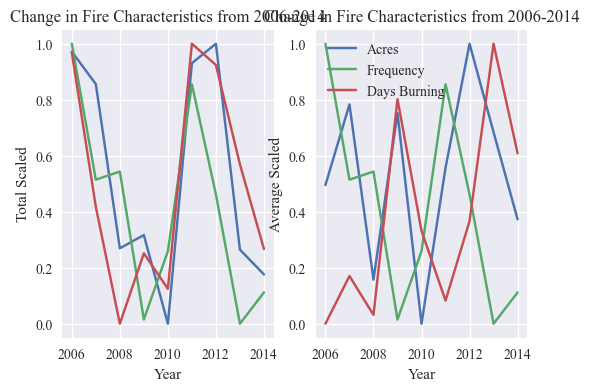

In [53]:
nrows = 1
ncols = 2
fig, axs = plt.subplots(nrows = nrows,
                            ncols = ncols,
                            figsize = figsize)
fire_labels = ['Acres', 'Frequency', 'Days Burning']
fire_totals = [total_acres_scaled, freq_scaled, total_days_burn_scaled]
fire_avgs = [av_acres_scaled, freq_scaled, av_days_burn_scaled]
fig, axs[0] = plot_predictors(fire_totals, fire_labels, time=years, time_label='Year', title="Change in Fire Characteristics from 2006-2014", 
                totals=True, averages=False, scaled=True, figsize=(12, 5), axs=axs[0], fig=fig, show=False, legend=False)
fig, axs[1] = plot_predictors(fire_avgs, fire_labels, time=years, time_label='Year', title="Change in Fire Characteristics from 2006-2014", 
                totals=False, averages=True, scaled=True, figsize=(12, 5), axs=axs[1], fig=fig, show=False)
plt.show()

#### Operations

operational trends are examined as aerial assets (total and max in one day), personnel (total and max in one day), and projected cost.
potentially add number of sit reports (INC_MGMT_NUM_SITREPS)??

In [54]:
operational_trends_cols = ["TOTAL_AERIAL_SUM", "TOTAL_PERSONNEL_SUM", "WF_PEAK_AERIAL", "WF_PEAK_PERSONNEL", "START_YEAR","PROJECTED_FINAL_IM_COST"]
operational_trends_df = incident_summary_df[operational_trends_cols]

In [55]:
total_aerial = {}
average_aerial = {}
total_person = {}
average_person = {}
total_cost = {}
average_cost = {}
for year in years:
    list_of_person = []
    list_of_aerial = []
    temp_df = operational_trends_df.loc[operational_trends_df['START_YEAR']==year]
    list_of_person = temp_df['WF_PEAK_PERSONNEL'].fillna(value=0).tolist()
    list_of_aerial = temp_df["WF_PEAK_AERIAL"].fillna(value=0).tolist()
    list_of_cost = temp_df["PROJECTED_FINAL_IM_COST"].dropna().tolist()
    average_aerial[year] = np.average(list_of_aerial)
    total_aerial[year] = np.sum(list_of_aerial)
    average_person[year] = np.average(list_of_person)
    total_person[year] = np.sum(list_of_person)
    average_cost[year] = np.average(list_of_cost)
    total_cost[year] = np.sum(list_of_cost)

In [56]:
ops_predictors = [total_cost.values(), total_aerial.values(), total_person.values()]
combined_predictors['Operations'] = combine_predictors(ops_predictors)

In [57]:
av_aerial = average_aerial.values()
total_aerial = total_aerial.values()

av_person = average_person.values()
total_person = total_person.values()
av_cost = average_cost.values()
total_cost = total_cost.values()

#### Graphs

In [58]:
av_cost_scaled = minmax_scale(av_cost)
av_person_scaled = minmax_scale(av_person)
av_aerial_scaled = minmax_scale(av_aerial)

total_cost_scaled = minmax_scale(total_cost)
total_person_scaled = minmax_scale(total_person)
total_aerial_scaled = minmax_scale(total_aerial)

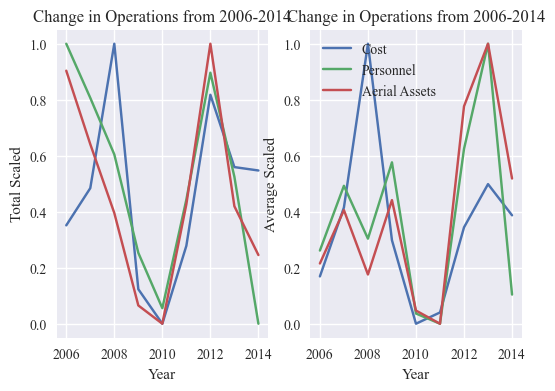

In [59]:
nrows = 1
ncols = 2
fig, axs = plt.subplots(nrows = nrows,
                            ncols = ncols,
                            figsize = figsize)
operations_labels = ['Cost', 'Personnel', 'Aerial Assets']
operations_totals = [total_cost_scaled, total_person_scaled, total_aerial_scaled]
operations_avgs = [av_cost_scaled, av_person_scaled, av_aerial_scaled]
fig, axs[0] = plot_predictors(operations_totals, operations_labels, time=years, time_label='Year', title="Change in Operations from 2006-2014", 
                totals=True, averages=False, scaled=True, figsize=(12, 5), axs=axs[0], fig=fig, show=False, legend=False)
fig, axs[1] = plot_predictors(operations_avgs, operations_labels, time=years, time_label='Year', title="Change in Operations from 2006-2014", 
                totals=False, averages=True, scaled=True, figsize=(12, 5), axs=axs[1], fig=fig, show=False)
plt.show()

#### Intensity
intensity is looked at as the number of injuries, number of fatalities, number of structures damaged, number of structures destroyed

In [60]:
intensity_cols = ["STR_DESTROYED_TOTAL","STR_DAMAGED_TOTAL","INJURIES_TOTAL","FATALITIES", "START_YEAR"]
intensity_df = incident_summary_df[intensity_cols]
#intensity_df

In [61]:
total_str_des = {}
average_str_des = {}
total_str_damage = {}
average_str_damage = {}
total_injuries = {}
average_injuries = {}
total_fatalities = {}
average_fatalities = {}

for year in years:
    temp_df =intensity_df.loc[intensity_df['START_YEAR']==year]
    list_of_dest = temp_df["STR_DESTROYED_TOTAL"].tolist()
    list_of_dam = temp_df["STR_DAMAGED_TOTAL"].tolist()
    list_of_injury = temp_df["INJURIES_TOTAL"].tolist()
    list_of_fatalities = temp_df["FATALITIES"].tolist()
    total_str_des[year] = np.sum(list_of_dest)
    average_str_des[year] = np.average(list_of_dest)
    total_str_damage[year] = np.sum(list_of_dam)
    average_str_damage[year] = np.average(list_of_dam)
    total_injuries[year] = np.sum(list_of_injury)
    average_injuries[year] = np.average(list_of_injury)
    total_fatalities[year] = np.sum(list_of_fatalities)
    average_fatalities[year] = np.average(list_of_fatalities)

In [62]:
intensity_predictors = [total_fatalities.values(), total_str_damage.values(), total_injuries.values(), total_str_des.values()]
combined_predictors['Intensity'] = combine_predictors(intensity_predictors)

In [63]:
av_des = average_str_des.values()
total_des = total_str_des.values()
av_damage = average_str_damage.values()
total_damage = total_str_damage.values()
av_injury = average_injuries.values()
total_injury = total_injuries.values()
av_fatality = average_fatalities.values()
total_fatality = total_fatalities.values()

#### Graphs

In [64]:
total_fatality_scaled = minmax_scale(total_fatality)
total_injury_scaled = minmax_scale(total_injury)
total_damage_scaled = minmax_scale(total_damage)
total_des_scaled = minmax_scale(total_des)

av_fatality_scaled = minmax_scale(av_fatality)
av_injury_scaled = minmax_scale(av_injury)
av_damage_scaled = minmax_scale(av_damage)
av_des_scaled = minmax_scale(av_des)

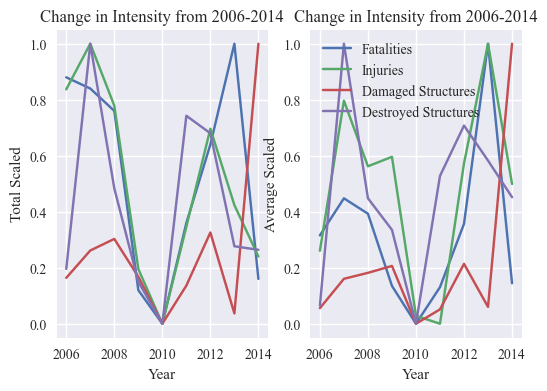

In [65]:
nrows = 1
ncols = 2
fig, axs = plt.subplots(nrows = nrows,
                            ncols = ncols,
                            figsize = figsize)
intensity_labels = ['Fatalities', 'Injuries', 'Damaged Structures', 'Destroyed Structures']
intensity_totals = [total_fatality_scaled, total_injury_scaled, total_damage_scaled, total_des_scaled]
intensity_avgs = [av_fatality_scaled, av_injury_scaled, av_damage_scaled, av_des_scaled]
fig, axs[0] = plot_predictors(intensity_totals, intensity_labels, time=years, time_label='Year', title="Change in Intensity from 2006-2014", 
                totals=True, averages=False, scaled=True, figsize=(12, 5), axs=axs[0], fig=fig, show=False, legend=False)
fig, axs[1] = plot_predictors(intensity_avgs, intensity_labels, time=years, time_label='Year', title="Change in Intensity from 2006-2014", 
                totals=False, averages=True, scaled=True, figsize=(12, 5), axs=axs[1], fig=fig, show=False)
plt.show()

#### Predictors Correlation Matrix

In [66]:
totals = {"Fire Frequency": count,
    "total Days Fires Burned": total_days_burn,
    "total Acres Fires Burned": total_acre,
    "total Aerial Assets": total_aerial,
    "total Personnel": total_person,
    "total Cost": total_cost,
    "total Structures Damaged": total_damage,
    "total Structures Destroyed": total_des,
    "total Injuries": total_injury,
    "total Fatalities": total_fatality}
totals_df = pd.DataFrame(totals)

averages = {
    "fire frequency": count,
    "average days fire burns": av_days_burn,
    "average acres fire burns": av_acres,
    "average aerial assets per fire": av_aerial,
    "average personnel per fire": av_person,
    "average cost per fire": av_cost,
    "average structures damaged per fire": av_damage,
    "average structures destroyed per fire": av_des,
    "average injuries per fire": av_injury,
    "average fatalities per fire": av_fatality}
avs_df = pd.DataFrame(averages)

totals_scaled = {feature:minmax_scale(totals[feature]) for feature in totals}


In [67]:
combined_predictors_scaled = combined_predictors.copy()
for col in combined_predictors_scaled:
    combined_predictors_scaled[col] = minmax_scale(combined_predictors_scaled[col])

As seen above, fire frequency is negatively correlated with assets, indicating higher frequencies may be smaller fires, where lower frequencies are related to larger fires, thus more assets. 

The average days the fire burns is weakly correlated with max assets, would likely be closer correlated with total assets accross an operation. Negatively correlated with fire frequency, indication longer fires occur less frequently.

average acres burned is moderately positively correlated with assets, but for some reason is negatively correlated with days burning (could be due to outliers)

average maximum aerial assets is strongest correlated with personnel, which makes sense. Also positively correlated with acres burned, days burning, and cost, indicating more aerial support is needed in more intense fires.

average maximum personnel is positively correlated with acres burned and days burning

cost is most strongly associated with days burning, assets, and personnel, but it is still moderate. Cost can likely be explained better by number of structures damages

In [68]:
lines = {"Fire Frequency": '--',
    "total Days Fires Burned": '--',
    "total Acres Fires Burned": '--',
    "total Aerial Assets": '-',
    "total Personnel": '-',
    "total Cost": '-',
    "total Structures Damaged": ':',
    "total Structures Destroyed": ':',
    "total Injuries": ':',
    "total Fatalities": ':'}
colors = cm.tab10(np.linspace(0, 1, len(lines)))
colors_dict = {}
i = 0
for feature in lines:
    colors_dict[feature] = colors[i]
    i+=1
markers = {"Fire Frequency": '.',
    "total Days Fires Burned": 'v',
    "total Acres Fires Burned": '^',
    "total Aerial Assets": 's',
    "total Personnel": 'p',
    "total Cost": 'P',
    "total Structures Damaged": 'h',
    "total Structures Destroyed": 'X',
    "total Injuries": 'D',
    "total Fatalities": '*'}

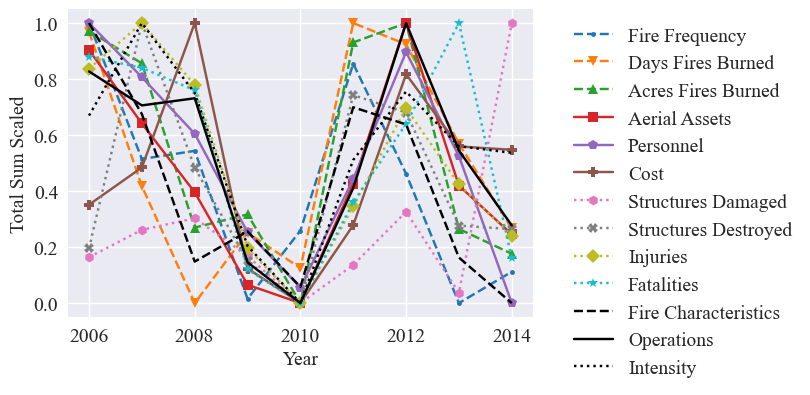

In [69]:
plt.figure(figsize=figsize)
plt.ylabel("Total Sum Scaled", fontsize=fontsize)
plt.xlabel("Year", fontsize=fontsize)
#plt.title("Fire, Operations, and Intensity Trends from 2006-2014")
#years = [year.strip(".") for year in years]
for feature in totals_scaled:
    plt.plot(years, totals_scaled[feature], label=feature.replace("total ",""), linestyle=lines[feature], marker=markers[feature], color=colors_dict[feature])
    plt.tick_params(labelsize=fontsize)
#plt.plot([],[], label='Fire Characteristics', color='black', linestyle='--')
#plt.plot([],[], label = 'Operations', color='black', linestyle = '-')
#plt.plot([],[], label = 'Intensity', color = 'black', linestyle = ':') 
plt.plot(years,combined_predictors_scaled['Fire Characteristics'], label='Fire Characteristics', color='black', linestyle='--')
plt.plot(years,combined_predictors_scaled['Operations'], label = 'Operations', color='black', linestyle = '-')
plt.plot(years,combined_predictors_scaled['Intensity'], label = 'Intensity', color = 'black', linestyle = ':')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=fontsize)
plt.savefig('predictors_scaled.pdf', bbox_inches="tight") 
plt.show()

In [70]:
combined_predictors_unscaled = pd.DataFrame()
fire_predictors = [total_acres.values(), counts, total_days_burning.values()]
combined_predictors_unscaled['Fire Characteristics'] = combine_predictors(fire_predictors, scale=False)
combined_predictors_unscaled.index = years
intensity_predictors = [total_fatalities.values(), total_str_damage.values(), total_injuries.values(), total_str_des.values()]
ops_predictors = [total_cost, total_aerial, total_person]
combined_predictors_unscaled['Operations'] = combine_predictors(ops_predictors, scale=False)
combined_predictors_unscaled['Intensity'] = combine_predictors(intensity_predictors, scale=False)

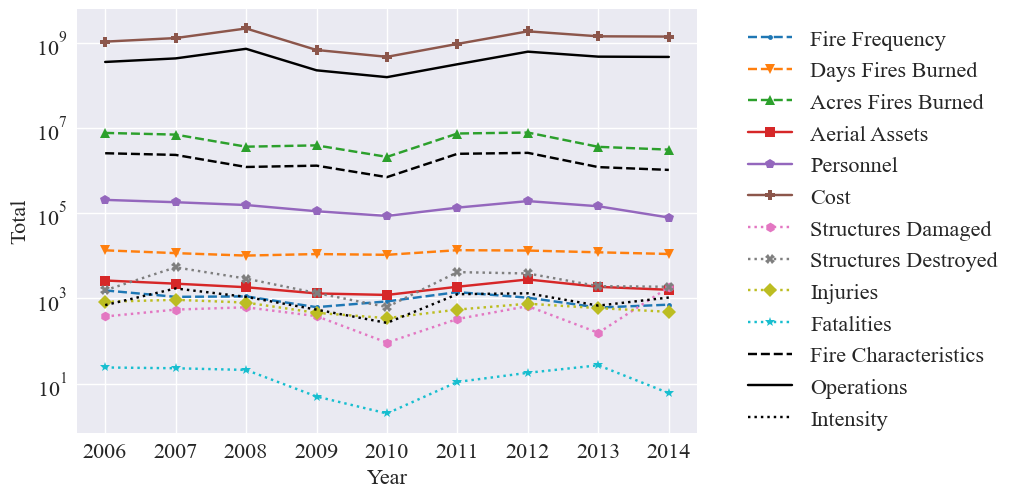

In [71]:
plt.figure()
plt.ylabel("Total", fontsize=16)
plt.xlabel("Year", fontsize=16)
#plt.title("Fire, Operations, and Intensity Trends from 2006-2014")
#years = [year.strip(".") for year in years]
for feature in totals:
    plt.plot(years, totals[feature], label=feature.replace("total ",""), linestyle=lines[feature], marker=markers[feature], color=colors_dict[feature])
    plt.tick_params(labelsize=16)
#plt.plot([],[], label='Fire Characteristics', color='black', linestyle='--')
#plt.plot([],[], label = 'Operations', color='black', linestyle = '-')
#plt.plot([],[], label = 'Intensity', color = 'black', linestyle = ':') 
plt.plot(years,combined_predictors_unscaled['Fire Characteristics'], label='Fire Characteristics', color='black', linestyle='--')
plt.plot(years,combined_predictors_unscaled['Operations'], label = 'Operations', color='black', linestyle = '-')
plt.plot(years,combined_predictors_unscaled['Intensity'], label = 'Intensity', color = 'black', linestyle = ':')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)
plt.yscale('log')
plt.savefig('predictors.pdf', bbox_inches="tight") 
plt.show()

## Secondary Analysis:
- Correlation matrix
- Multiple Regression
- Risk Matrix

### Multiple regression
typically multiple regression is used as a prediction algorithm, given a certain set of continuous inputs X=(x1,2,...xn), what is the value of continuous variable y? Multiple regression uses a linear combination of X to produce y, and the error in y/goodness of fit indicates how good the predictors are.

The importance of a predictor, xi, is evaluated by shuffling its input values, and seeing how the goodness of fit/error changes.

#### Our goal: 
use regression to determine what the most important predictors are for the frequency of hazards. Since we have a limited number of data points (9) we will not be predicting on unseen data.

##### Inputs/Predictors: 
All operations trends, fire characteristics, and intensity
##### Output/y: 
annual frequency of hazards time series
##### Method:
for each hazard, use its frequency time series:
1. fit linear regression model to the X,y
2. calculate correlation coefficient
For each Xi:
3. Randomly shuffle the input values
4. Have the full model predict the y value
5. record correlation coefficient
5. record (orignal coefficient-shuffled xi coefficient) -> positive large delta means importance, negative delta indicates it should be removed, small delta means little importance

Future goal: use ML to determine whether or not a hazard will occur based on past incident reports

### Combined Predictors

In [72]:
corrMatrix_fires, correlation_mat_total_fires, p_values = create_correlation_matrix(combined_predictors_scaled, fire_freqs_scaled, graph=False, figsize=(9,8), fontsize=12)

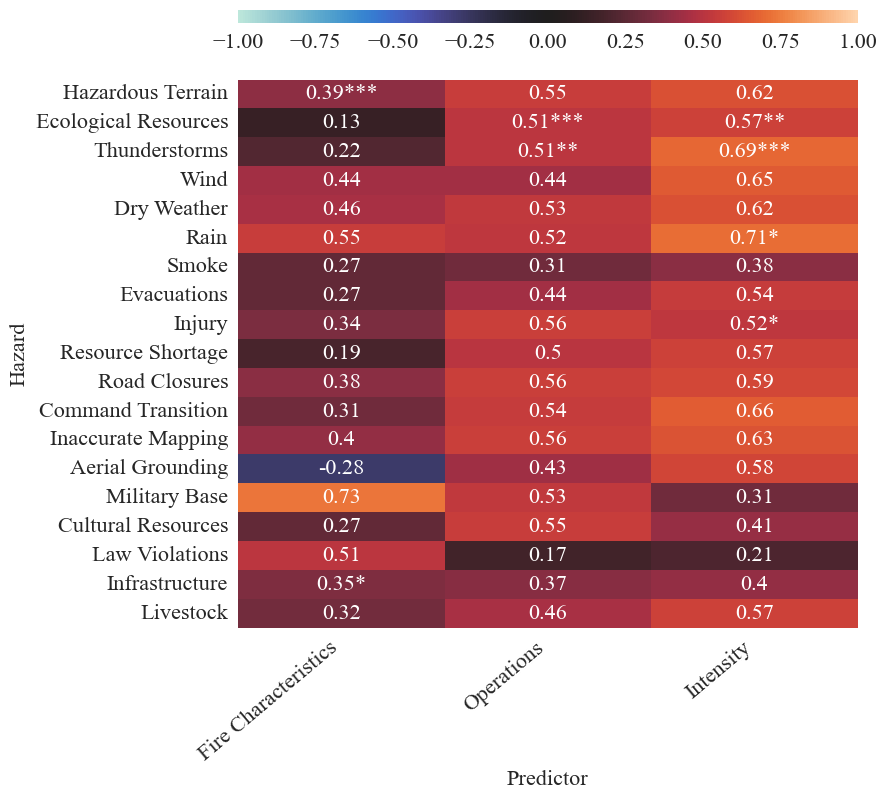

In [73]:
predictors = [p for p in combined_predictors_scaled]
hazards = [h for h in fire_freqs_scaled]
reshape_correlation_matrix(corrMatrix_fires, p_values, predictors, hazards)

C:\Users\srandrad\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_pdf.py:1649: DeprecationWarning: NONE is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.NEAREST or Dither.NONE instead.
  img = img.convert(mode='P', dither=Image.NONE,
C:\Users\srandrad\AppData\Roaming\Python\Python38\site-packages\matplotlib\backends\backend_pdf.py:1650: DeprecationWarning: ADAPTIVE is deprecated and will be removed in Pillow 10 (2023-07-01). Use Palette.ADAPTIVE instead.
  palette=Image.ADAPTIVE, colors=num_colors)


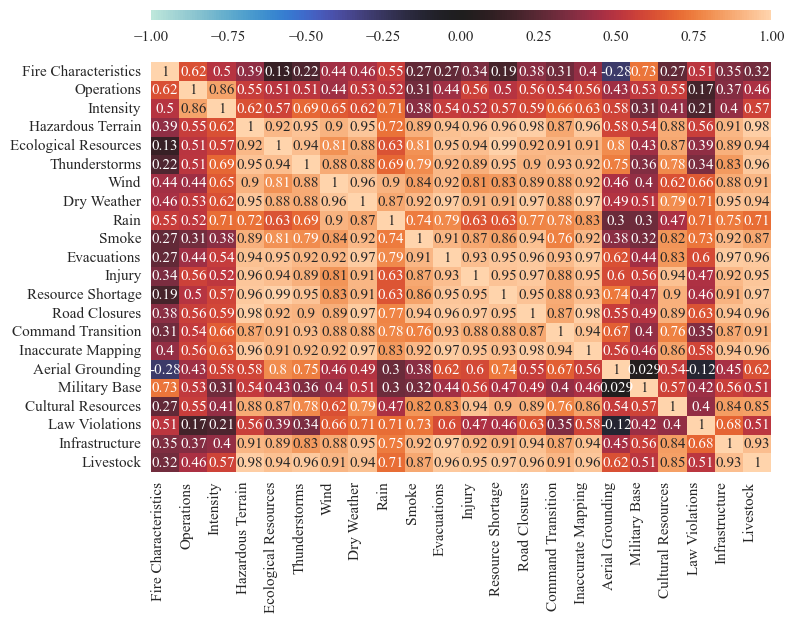

In [74]:
corrMatrix_fires, correlation_mat_total_fires, p_values = create_correlation_matrix(combined_predictors_scaled, fire_freqs_scaled, graph=True, figsize=(8,6), fontsize=11, save=True, results_path=os.path.join('correlation_matrix'))

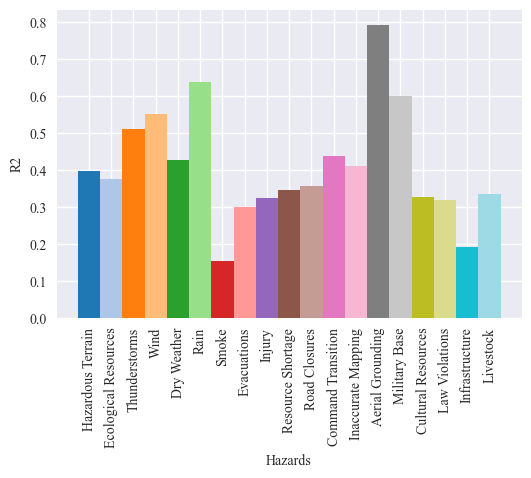

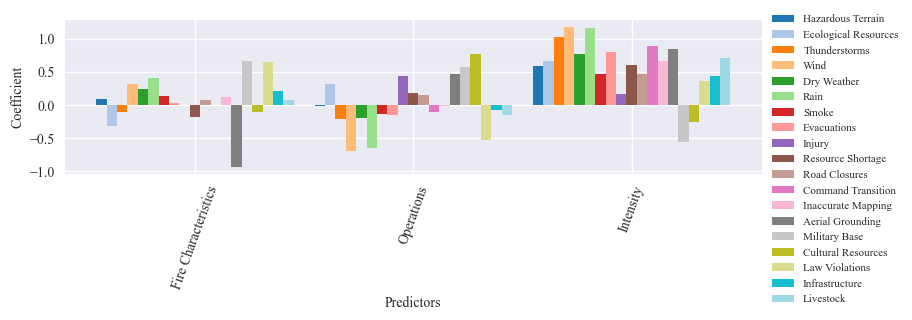

hazard  R2 for full model  MSE for full model  \
0      Hazardous Terrain              0.398               0.048   
1   Ecological Resources              0.377               0.089   
2          Thunderstorms              0.511               0.047   
3                   Wind              0.552               0.042   
4            Dry Weather              0.426               0.062   
5                   Rain              0.639               0.036   
6                  Smoke              0.154               0.084   
7            Evacuations              0.301               0.087   
8                 Injury              0.323               0.067   
9      Resource Shortage              0.347               0.072   
10         Road Closures              0.358               0.064   
11    Command Transition              0.437               0.066   
12    Inaccurate Mapping              0.412               0.059   
13      Aerial Grounding              0.793               0.027   
14         Military Base              0.600               0.048   
15    Cultural Resources              0.328               0.055   
16        Law Violations              0.320               0.069   
17        Infrastructure              0.192               0.092   
18             Livestock              0.336               0.059   

    Fire Characteristics removed score  Operations removed score  \
0                                0.409                     0.406   
1                                0.039                     0.123   
2                                0.450                     0.471   
3                                0.351                    -0.748   
4                                0.367                     0.361   
5                                0.145                    -0.455   
6                                0.129                     0.161   
7                                0.311                     0.287   
8                                0.320                    -0.393   
9                                0.173                     0.212   
10                               0.369                     0.240   
11                               0.437                     0.450   
12                               0.392                     0.417   
13                              -1.452                     0.303   
14                               0.014                    -0.170   
15                               0.246                    -2.172   
16                              -0.475                    -0.532   
17                               0.173                     0.198   
18                               0.354                     0.322   

    Intensity removed score  Fire Characteristics removed MSE  \
0                    -0.237                             0.047   
1                    -0.113                             0.138   
2                    -1.205                             0.053   
3                    -1.659                             0.061   
4                    -0.381                             0.068   
5                    -1.419                             0.086   
6                    -0.146                             0.086   
7                    -0.505                             0.086   
8                     0.276                             0.067   
9                    -0.158                             0.091   
10                    0.051                             0.062   
11                   -0.789                             0.066   
12                   -0.271                             0.061   
13                   -0.084                             0.321   
14                    0.230                             0.118   
15                    0.216                             0.061   
16                    0.213                             0.150   
17                   -0.079                             0.094   
18                   -0.529                             0.057   

    Operations 

hazard  R2 for full model  MSE for full model  \
0      Hazardous Terrain              0.398               0.048   
1   Ecological Resources              0.377               0.089   
2          Thunderstorms              0.511               0.047   
3                   Wind              0.552               0.042   
4            Dry Weather              0.426               0.062   
5                   Rain              0.639               0.036   
6                  Smoke              0.154               0.084   
7            Evacuations              0.301               0.087   
8                 Injury              0.323               0.067   
9      Resource Shortage              0.347               0.072   
10         Road Closures              0.358               0.064   
11    Command Transition              0.437               0.066   
12    Inaccurate Mapping              0.412               0.059   
13      Aerial Grounding              0.793               0.027   
14         Military Base              0.600               0.048   
15    Cultural Resources              0.328               0.055   
16        Law Violations              0.320               0.069   
17        Infrastructure              0.192               0.092   
18             Livestock              0.336               0.059   

    Fire Characteristics removed score  Operations removed score  \
0                                0.010                     0.008   
1                                0.338                     0.254   
2                                0.061                     0.040   
3                                0.201                     1.301   
4                                0.059                     0.065   
5                                0.495                     1.094   
6                                0.025                     0.007   
7                                0.010                     0.013   
8                                0.003                     0.716   
9                                0.174                     0.134   
10                               0.011                     0.118   
11                               0.000                     0.013   
12                               0.021                     0.005   
13                               2.245                     0.489   
14                               0.587                     0.771   
15                               0.082                     2.500   
16                               0.795                     0.852   
17                               0.019                     0.006   
18                               0.018                     0.013   

    Intensity removed score  Fire Characteristics removed MSE  \
0                     0.636                             0.001   
1                     0.490                            -0.049   
2                     1.716                            -0.006   
3                     2.211                            -0.019   
4                     0.807                            -0.006   
5                     2.059                            -0.050   
6                     0.300                            -0.002   
7                     0.805                             0.001   
8                     0.048                            -0.000   
9                     0.505                            -0.019   
10                    0.307                             0.001   
11                    1.226                            -0.000   
12                    0.684                            -0.002   
13                    0.877                            -0.294   
14                    0.370                            -0.070   
15                    0.112                            -0.007   
16                    0.106                            -0.081   
17                    0.272                            -0.002   
18                    0.864                             0.002   

    Operations 

Hazardous Terrain  Ecological Resources  Thunderstorms  \
Fire Characteristics           0.095744             -0.313514      -0.105875   
Operations                    -0.022295              0.309108      -0.211922   
Intensity                      0.589151              0.659442       1.020362   

                          Wind  Dry Weather      Rain     Smoke  Evacuations  \
Fire Characteristics  0.318352     0.241583  0.410931  0.132562     0.030633   
Operations           -0.694471    -0.200577 -0.642130 -0.136309    -0.146819   
Intensity             1.178706     0.771584  1.156592  0.469682     0.801286   

                        Injury  Resource Shortage  Road Closures  \
Fire Characteristics -0.008230          -0.175735       0.067870   
Operations            0.436775           0.177629       0.154156   
Intensity             0.170047           0.603995       0.464643   

                      Command Transition  Inaccurate Mapping  \
Fire Characteristics           -0.005561            0.114858   
Operations                     -0.102439           -0.013382   
Intensity                       0.895520            0.654770   

                      Aerial Grounding  Military Base  Cultural Resources  \
Fire Characteristics         -0.931697       0.657452           -0.113661   
Operations                    0.463498       0.578210            0.774194   
Intensity                     0.843958      -0.560887           -0.258116   

                      Law Violations  Infrastructure  Livestock  
Fire Characteristics        0.645235        0.216450   0.075068  
Operations                 -0.530265       -0.083715  -0.151685  
Intensity                   0.361587        0.431959   0.701494

In [75]:
predictors = [p for p in combined_predictors_scaled]
hazards = [h.replace("total ","") for h in fire_freqs_scaled]
results_df, delta_df, coefficient_df = multiple_reg_feature_importance(predictors, hazards, correlation_mat_total_fires, 
                                                       save=True, results_path=os.path.join('multiple_regression'),
                                                      r2_figsize=figsize, r2_fontsize=fontsize-4, predictor_import_figsize = (9, 2), predictor_import_fontsize=fontsize-4)
display(results_df, delta_df, coefficient_df)

### Full predictors

In [76]:
corrMatrix_fires, correlation_mat_total_fires, p_values = create_correlation_matrix(totals_scaled, fire_freqs_scaled, graph=False)

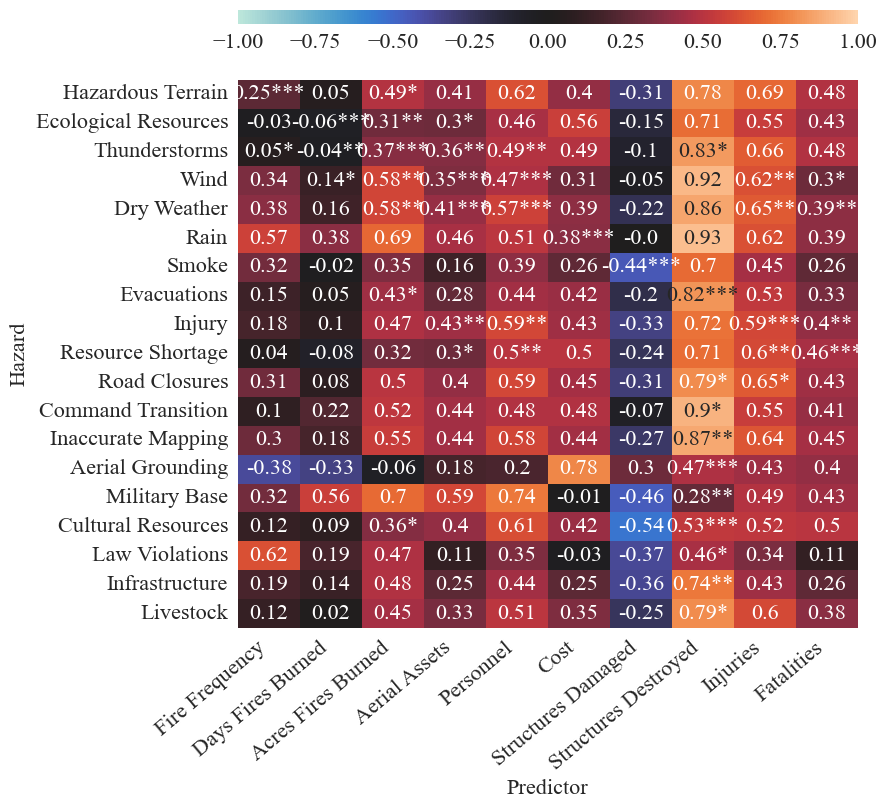

In [77]:
predictors = [p for p in totals_scaled]
hazards = [h for h in fire_freqs_scaled]
reshape_correlation_matrix(corrMatrix_fires, p_values, predictors, hazards)

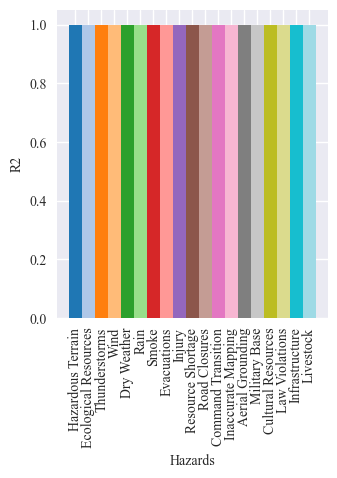

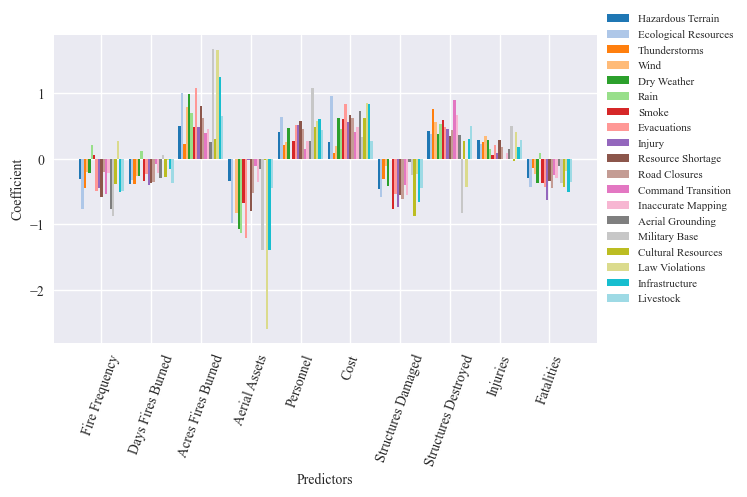

hazard  R2 for full model  MSE for full model  \
0      Hazardous Terrain                1.0                 0.0   
1   Ecological Resources                1.0                 0.0   
2          Thunderstorms                1.0                 0.0   
3                   Wind                1.0                 0.0   
4            Dry Weather                1.0                 0.0   
5                   Rain                1.0                 0.0   
6                  Smoke                1.0                 0.0   
7            Evacuations                1.0                 0.0   
8                 Injury                1.0                 0.0   
9      Resource Shortage                1.0                 0.0   
10         Road Closures                1.0                 0.0   
11    Command Transition                1.0                 0.0   
12    Inaccurate Mapping                1.0                 0.0   
13      Aerial Grounding                1.0                 0.0   
14         Military Base                1.0                 0.0   
15    Cultural Resources                1.0                 0.0   
16        Law Violations                1.0                 0.0   
17        Infrastructure                1.0                 0.0   
18             Livestock                1.0                 0.0   

    Fire Frequency removed score  total Days Fires Burned removed score  \
0                          0.680                                  0.206   
1                         -0.082                                  0.696   
2                          0.450                                  0.353   
3                          0.894                                  0.694   
4                          0.877                                  0.736   
5                          0.893                                  0.942   
6                          0.991                                  0.516   
7                          0.501                                  0.802   
8                          0.481                                  0.322   
9                          0.198                                  0.441   
10                         0.885                                  0.444   
11                         0.352                                  0.980   
12                         0.873                                  0.783   
13                        -0.176                                  0.723   
14                        -0.645                                  0.989   
15                         0.530                                  0.607   
16                         0.810                                  0.999   
17                         0.398                                  0.906   
18                         0.275                                  0.316   

    total Acres Fires Burned removed score  total Aerial Assets removed score  \
0                                   -0.237                              0.553   
1                                   -1.720                             -1.004   
2                                    0.784                              1.000   
3                                   -1.538                             -1.166   
4                                   -2.479                             -2.215   
5                                   -0.920                             -2.795   
6                                    0.105                             -0.402   
7                                   -2.623                             -2.489   
8                                    0.088                              0.998   
9                                   -1.338                             -0.769   
10                                  -0.509                              0.163   
11                                   0.491                              0.970   
12                                   0.183                              0.624   
13                                   0.801

hazard  R2 for full model  MSE for full model  \
0      Hazardous Terrain                1.0                 0.0   
1   Ecological Resources                1.0                 0.0   
2          Thunderstorms                1.0                 0.0   
3                   Wind                1.0                 0.0   
4            Dry Weather                1.0                 0.0   
5                   Rain                1.0                 0.0   
6                  Smoke                1.0                 0.0   
7            Evacuations                1.0                 0.0   
8                 Injury                1.0                 0.0   
9      Resource Shortage                1.0                 0.0   
10         Road Closures                1.0                 0.0   
11    Command Transition                1.0                 0.0   
12    Inaccurate Mapping                1.0                 0.0   
13      Aerial Grounding                1.0                 0.0   
14         Military Base                1.0                 0.0   
15    Cultural Resources                1.0                 0.0   
16        Law Violations                1.0                 0.0   
17        Infrastructure                1.0                 0.0   
18             Livestock                1.0                 0.0   

    Fire Frequency removed score  total Days Fires Burned removed score  \
0                          0.320                                  0.794   
1                          1.082                                  0.304   
2                          0.550                                  0.647   
3                          0.106                                  0.306   
4                          0.123                                  0.264   
5                          0.107                                  0.058   
6                          0.009                                  0.484   
7                          0.499                                  0.198   
8                          0.519                                  0.678   
9                          0.802                                  0.559   
10                         0.115                                  0.556   
11                         0.648                                  0.020   
12                         0.127                                  0.217   
13                         1.176                                  0.277   
14                         1.645                                  0.011   
15                         0.470                                  0.393   
16                         0.190                                  0.001   
17                         0.602                                  0.094   
18                         0.725                                  0.684   

    total Acres Fires Burned removed score  total Aerial Assets removed score  \
0                                    1.237                              0.447   
1                                    2.720                              2.004   
2                                    0.216                              0.000   
3                                    2.538                              2.166   
4                                    3.479                              3.215   
5                                    1.920                              3.795   
6                                    0.895                              1.402   
7                                    3.623                              3.489   
8                                    0.912                              0.002   
9                                    2.338                              1.769   
10                                   1.509                              0.837   
11                                   0.509                              0.030   
12                                   0.817                              0.376   
13                                   0.199

Hazardous Terrain  Ecological Resources  Thunderstorms  \
Fire Frequency                -0.313581             -0.771285      -0.449935   
Days Fires Burned             -0.385132             -0.318617      -0.380660   
Acres Fires Burned             0.503948              0.999900       0.230524   
Aerial Assets                 -0.345966             -0.980415      -0.006346   
Personnel                      0.404772              0.640593       0.205707   
Cost                           0.254719              0.962682       0.092205   
Structures Damaged            -0.456810             -0.580431      -0.316060   
Structures Destroyed           0.428869              0.381243       0.757483   
Injuries                       0.278519              0.228356       0.249203   
Fatalities                    -0.288774             -0.437670      -0.135920   

                          Wind  Dry Weather      Rain     Smoke  Evacuations  \
Fire Frequency       -0.196329    -0.225604  0.202982  0.059588    -0.488699   
Days Fires Burned    -0.259672    -0.257430  0.115959 -0.334563    -0.240227   
Acres Fires Burned    0.783731     0.979924  0.701707  0.476732     1.077046   
Aerial Assets        -0.827021    -1.076034 -1.126873 -0.681862    -1.207323   
Personnel             0.258009     0.470289 -0.007586  0.270491     0.511258   
Cost                  0.198314     0.627064  0.450813  0.608486     0.830326   
Structures Damaged   -0.116516    -0.410260  0.000946 -0.768907    -0.533447   
Structures Destroyed  0.565964     0.377243  0.532924  0.583970     0.477964   
Injuries              0.353876     0.288878  0.152031  0.058770     0.215857   
Fatalities           -0.230199    -0.368195  0.094284 -0.367375    -0.427765   

                        Injury  Resource Shortage  Road Closures  \
Fire Frequency       -0.442255          -0.581090      -0.208721   
Days Fires Burned    -0.394124          -0.378236      -0.357760   
Acres Fires Burned    0.479210           0.810874       0.618201   
Aerial Assets        -0.026165          -0.805801      -0.526007   
Personnel             0.520117           0.569720       0.449915   
Cost                  0.554710           0.668622       0.624789   
Structures Damaged   -0.730414          -0.551122      -0.617073   
Structures Destroyed  0.457771           0.344615       0.436865   
Injuries              0.090744           0.280603       0.171000   
Fatalities           -0.628802          -0.341738      -0.448117   

                      Command Transition  Inaccurate Mapping  \
Fire Frequency                 -0.538615           -0.220789   
Days Fires Burned              -0.074543           -0.225562   
Acres Fires Burned              0.390072            0.458425   
Aerial Assets                  -0.107781           -0.355459   
Personnel                       0.148036            0.267860   
Cost                            0.405531            0.486784   
Structures Damaged             -0.402928           -0.560947   
Structures Destroyed            0.893835            0.668565   
Injuries                       -0.001509            0.085335   
Fatalities                     -0.245164           -0.300802   

                      Aerial Grounding  Military Base  Cultural Resources  \
Fire Frequency               -0.768341      -0.867605           -0.382661   
Days Fires Burned            -0.290985       0.054977           -0.272717   
Acres Fires Burned            0.258290       1.678019            0.304997   
Aerial Assets                -0.158250      -1.388392           -0.019445   
Personnel                     0.277383       1.085640            0.483215   
Cost                          0.735040       0.333345            0.625970   
Structures Damaged           -0.055859      -0.252184           -0.867102   
Structures Destroyed          0.364034      -0.828011            0.272584   
Injuries                      0.148282       0.494017           -0.031798   
Fatalities                   -0.1075

In [78]:
predictors = [p for p in totals_scaled]
hazards = [h.replace("total ","") for h in fire_freqs_scaled]
results_df, delta_df, coefficient_df = multiple_reg_feature_importance(predictors, hazards, correlation_mat_total_fires)
display(results_df, delta_df, coefficient_df)

In [79]:
cols = [col for col in delta_df.columns if "MSE" in col]
delta_df.drop(cols, axis=1)

hazard  R2 for full model  Fire Frequency removed score  \
0      Hazardous Terrain                1.0                         0.320   
1   Ecological Resources                1.0                         1.082   
2          Thunderstorms                1.0                         0.550   
3                   Wind                1.0                         0.106   
4            Dry Weather                1.0                         0.123   
5                   Rain                1.0                         0.107   
6                  Smoke                1.0                         0.009   
7            Evacuations                1.0                         0.499   
8                 Injury                1.0                         0.519   
9      Resource Shortage                1.0                         0.802   
10         Road Closures                1.0                         0.115   
11    Command Transition                1.0                         0.648   
12    Inaccurate Mapping                1.0                         0.127   
13      Aerial Grounding                1.0                         1.176   
14         Military Base                1.0                         1.645   
15    Cultural Resources                1.0                         0.470   
16        Law Violations                1.0                         0.190   
17        Infrastructure                1.0                         0.602   
18             Livestock                1.0                         0.725   

    total Days Fires Burned removed score  \
0                                   0.794   
1                                   0.304   
2                                   0.647   
3                                   0.306   
4                                   0.264   
5                                   0.058   
6                                   0.484   
7                                   0.198   
8                                   0.678   
9                                   0.559   
10                                  0.556   
11                                  0.020   
12                                  0.217   
13                                  0.277   
14                                  0.011   
15                                  0.393   
16                                  0.001   
17                                  0.094   
18                                  0.684   

    total Acres Fires Burned removed score  total Aerial Assets removed score  \
0                                    1.237                              0.447   
1                                    2.720                              2.004   
2                                    0.216                              0.000   
3                                    2.538                              2.166   
4                                    3.479                              3.215   
5                                    1.920                              3.795   
6                                    0.895                              1.402   
7                                    3.623                              3.489   
8                                    0.912                              0.002   
9                                    2.338                              1.769   
10                                   1.509                              0.837   
11                                   0.509                              0.030   
12                                   0.817                              0.376   
13                                   0.199                              0.057   
14                                   9.206                              4.829   
15                                   0.447                              0.001   
16                                  10.595                             19.816   
17                                   5.407                              5.104   
18                                   

In [80]:
#correlation_mat_total_fires

# Experimental

In [81]:
totals = {key: list(totals[key]) for key in totals}

In [82]:
totals_new = {predictor: totals_scaled[predictor] for predictor in totals_scaled if predictor not in ["total Structures Damaged", "total Structures Destroyed"]}
totals_new["total structure"] = minmax_scale([totals["total Structures Damaged"][i]+totals["total Structures Destroyed"][i] for i in range(len(totals["total Structures Destroyed"]))])

In [83]:
corrMatrix_fires, correlation_mat_total_fires, p_values = create_correlation_matrix(totals_new, fire_freqs_scaled, graph=False)

In [84]:
correlation_mat_total_fires

Fire Frequency  total Days Fires Burned  total Acres Fires Burned  \
0        1.000000                 0.968467                  0.971840   
1        0.514501                 0.417518                  0.855911   
2        0.543502                 0.000000                  0.269501   
3        0.015038                 0.251387                  0.316664   
4        0.258861                 0.124672                  0.000000   
5        0.854995                 1.000000                  0.930638   
6        0.461869                 0.924088                  1.000000   
7        0.000000                 0.569343                  0.264532   
8        0.111708                 0.266861                  0.176067   

   total Aerial Assets  total Personnel  total Cost  total Injuries  \
0             0.903676         1.000000    0.351300        0.837050   
1             0.641318         0.806630    0.484181        1.000000   
2             0.395437         0.604627    1.000000        0.778731   
3             0.065272         0.253145    0.123329        0.195540   
4             0.000000         0.055537    0.000000        0.000000   
5             0.426489         0.443150    0.278302        0.346484   
6             1.000000         0.896474    0.817606        0.696398   
7             0.419518         0.524836    0.559381        0.423671   
8             0.245300         0.000000    0.547244        0.240137   

   total Fatalities  total structure  Hazardous Terrain  ...  \
0              0.88         0.233468           0.290398  ...   
1              0.84         1.000000           1.000000  ...   
2              0.76         0.542703           0.711944  ...   
3              0.12         0.192790           0.494145  ...   
4              0.00         0.000000           0.210773  ...   
5              0.36         0.723218           0.484778  ...   
6              0.64         0.729902           0.697892  ...   
7              1.00         0.264700           0.372365  ...   
8              0.16         0.576248           0.000000  ...   

   Resource Shortage  Road Closures  Command Transition  Inaccurate Mapping  \
0           0.130682       0.302326            0.000000            0.206667   
1           1.000000       1.000000            1.000000            1.000000   
2           0.857955       0.888372            0.534161            0.740000   
3           0.602273       0.530233            0.360248            0.413333   
4           0.136364       0.255814            0.006211            0.166667   
5           0.431818       0.655814            0.627329            0.693333   
6           0.778409       0.837209            0.894410            0.806667   
7           0.488636       0.376744            0.453416            0.393333   
8           0.000000       0.000000            0.124224            0.000000   

   Aerial Grounding  Military Base  Cultural Resources  Law Violations  \
0          0.000000            1.0            0.432692        0.582090   
1          0.904762            0.8            0.875000        0.656716   
2          1.000000            0.4            0.894231        0.791045   
3          0.523810            1.0            0.653846        0.686567   
4          0.095238            0.2            0.490385        0.223881   
5          0.142857            0.6            0.576923        1.000000   
6          0.904762            1.0            1.000000        0.313433   
7          0.761905            0.6            0.711538        0.104478   
8          0.619048            0.0            0.000000        0.000000   

   Infrastructure  Livestock  
0        0.228571   0.142857  
1        1.000000   1.000000  
2        0.790476   0.619048  
3        0.800000   0.533333  
4        0.257143   0.152381  
5        0.866667   0.457143  
6        0.876190   0.695238  
7        0.447619   0.333333  
8        0.000000   0.000000  

[9 rows x 28 columns]

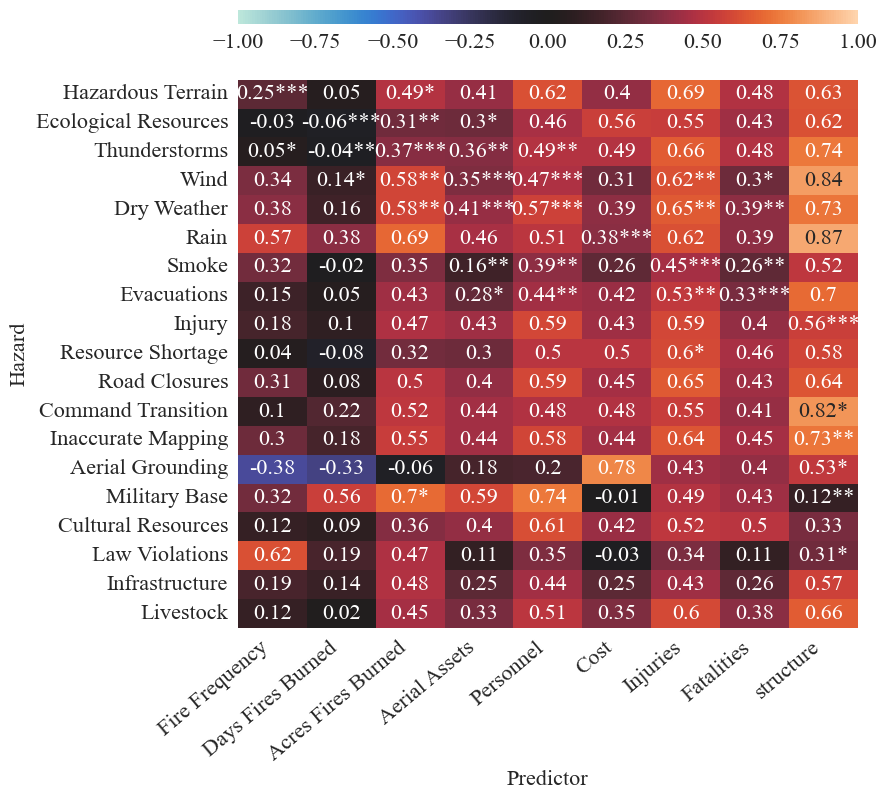

In [85]:
predictors = [p for p in totals_new]
hazards = [h for h in fire_freqs_scaled]
reshape_correlation_matrix(corrMatrix_fires, p_values, predictors, hazards)

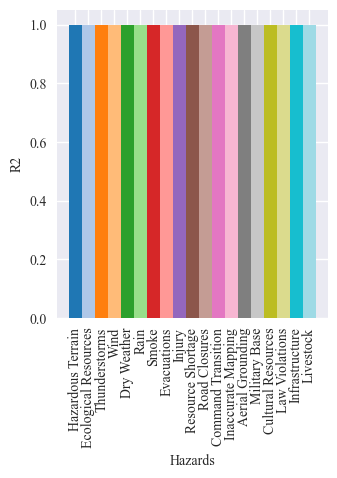

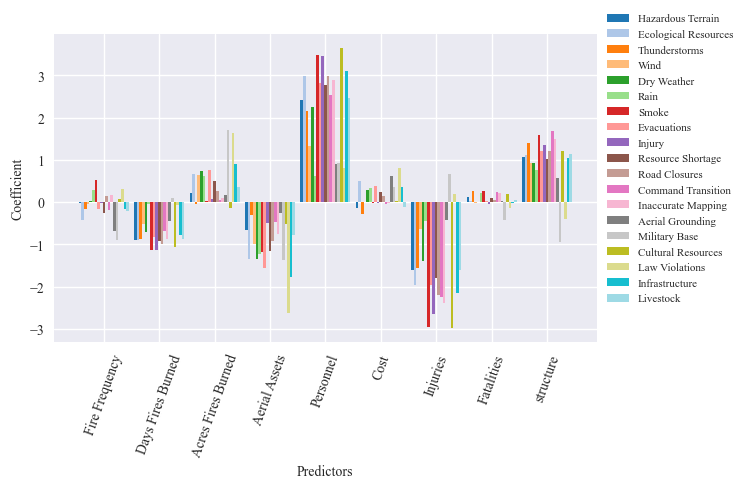

hazard  R2 for full model  MSE for full model  \
0      Hazardous Terrain                1.0                 0.0   
1   Ecological Resources                1.0                 0.0   
2          Thunderstorms                1.0                 0.0   
3                   Wind                1.0                 0.0   
4            Dry Weather                1.0                 0.0   
5                   Rain                1.0                 0.0   
6                  Smoke                1.0                 0.0   
7            Evacuations                1.0                 0.0   
8                 Injury                1.0                 0.0   
9      Resource Shortage                1.0                 0.0   
10         Road Closures                1.0                 0.0   
11    Command Transition                1.0                 0.0   
12    Inaccurate Mapping                1.0                 0.0   
13      Aerial Grounding                1.0                 0.0   
14         Military Base                1.0                 0.0   
15    Cultural Resources                1.0                 0.0   
16        Law Violations                1.0                 0.0   
17        Infrastructure                1.0                 0.0   
18             Livestock                1.0                 0.0   

    Fire Frequency removed score  total Days Fires Burned removed score  \
0                          0.998                                 -3.219   
1                          0.656                                 -1.463   
2                          0.919                                 -2.368   
3                          0.994                                 -0.259   
4                          0.998                                 -0.988   
5                          0.775                                  0.991   
6                          0.292                                 -4.610   
7                          0.948                                 -1.310   
8                          0.999                                 -4.561   
9                          0.834                                 -2.396   
10                         0.937                                 -3.285   
11                         0.913                                 -0.671   
12                         0.937                                 -2.354   
13                         0.080                                  0.345   
14                        -0.739                                  0.964   
15                         0.985                                 -4.960   
16                         0.762                                  0.980   
17                         0.945                                 -1.311   
18                         0.875                                 -2.789   

    total Acres Fires Burned removed score  total Aerial Assets removed score  \
0                                    0.768                             -0.623   
1                                   -0.201                             -2.790   
2                                    0.992                              0.703   
3                                   -0.664                             -2.116   
4                                   -0.903                             -4.106   
5                                   -0.465                             -3.489   
6                                    0.999                             -3.227   
7                                   -0.745                             -4.893   
8                                    0.985                              0.284   
9                                    0.128                             -2.615   
10                                   0.741                             -1.578   
11                                   0.991                              0.409   
12                                   0.973                             -0.752   
13                                   0.913

hazard  R2 for full model  MSE for full model  \
0      Hazardous Terrain                1.0                 0.0   
1   Ecological Resources                1.0                 0.0   
2          Thunderstorms                1.0                 0.0   
3                   Wind                1.0                 0.0   
4            Dry Weather                1.0                 0.0   
5                   Rain                1.0                 0.0   
6                  Smoke                1.0                 0.0   
7            Evacuations                1.0                 0.0   
8                 Injury                1.0                 0.0   
9      Resource Shortage                1.0                 0.0   
10         Road Closures                1.0                 0.0   
11    Command Transition                1.0                 0.0   
12    Inaccurate Mapping                1.0                 0.0   
13      Aerial Grounding                1.0                 0.0   
14         Military Base                1.0                 0.0   
15    Cultural Resources                1.0                 0.0   
16        Law Violations                1.0                 0.0   
17        Infrastructure                1.0                 0.0   
18             Livestock                1.0                 0.0   

    Fire Frequency removed score  total Days Fires Burned removed score  \
0                          0.002                                  4.219   
1                          0.344                                  2.463   
2                          0.081                                  3.368   
3                          0.006                                  1.259   
4                          0.002                                  1.988   
5                          0.225                                  0.009   
6                          0.708                                  5.610   
7                          0.052                                  2.310   
8                          0.001                                  5.561   
9                          0.166                                  3.396   
10                         0.063                                  4.285   
11                         0.087                                  1.671   
12                         0.063                                  3.354   
13                         0.920                                  0.655   
14                         1.739                                  0.036   
15                         0.015                                  5.960   
16                         0.238                                  0.020   
17                         0.055                                  2.311   
18                         0.125                                  3.789   

    total Acres Fires Burned removed score  total Aerial Assets removed score  \
0                                    0.232                              1.623   
1                                    1.201                              3.790   
2                                    0.008                              0.297   
3                                    1.664                              3.116   
4                                    1.903                              5.106   
5                                    1.465                              4.489   
6                                    0.001                              4.227   
7                                    1.745                              5.893   
8                                    0.015                              0.716   
9                                    0.872                              3.615   
10                                   0.259                              2.578   
11                                   0.009                              0.591   
12                                   0.027                              1.752   
13                                   0.087

Hazardous Terrain  Ecological Resources  Thunderstorms  \
Fire Frequency              -0.026710             -0.434907      -0.172281   
Days Fires Burned           -0.887679             -0.907474      -0.868228   
Acres Fires Burned           0.218366              0.664421      -0.044154   
Aerial Assets               -0.659419             -1.348238      -0.308950   
Personnel                    2.408827              2.991060       2.143770   
Cost                        -0.132613              0.508451      -0.282524   
Injuries                    -1.601518             -1.975918      -1.571002   
Fatalities                   0.111248              0.031103       0.252046   
structure                    1.055031              1.103966       1.395890   

                        Wind  Dry Weather      Rain     Smoke  Evacuations  \
Fire Frequency     -0.044706     0.030674  0.294113  0.518757    -0.157628   
Days Fires Burned  -0.526449    -0.706361 -0.045041 -1.138592    -0.820146   
Acres Fires Burned  0.634500     0.724769  0.612986  0.019111     0.747378   
Aerial Assets      -0.991925    -1.356072 -1.225549 -1.183809    -1.569110   
Personnel           1.315660     2.260642  0.627199  3.478669     2.824167   
Cost               -0.006252     0.281038  0.327950 -0.011527     0.383307   
Injuries           -0.640381    -1.390647 -0.445877 -2.950252    -1.953818   
Fatalities         -0.017979    -0.010848  0.222284  0.272664     0.033852   
structure           0.928990     0.936069  0.769336  1.576520     1.198997   

                      Injury  Resource Shortage  Road Closures  \
Fire Frequency     -0.022735          -0.264684       0.154315   
Days Fires Burned  -1.128467          -0.932083      -0.993370   
Acres Fires Burned  0.060722           0.495242       0.256264   
Aerial Assets      -0.484941          -1.151817      -0.922921   
Personnel           3.451628           2.780700       2.986533   
Cost               -0.011801           0.241353       0.134572   
Injuries           -2.658327          -1.792774      -2.208000   
Fatalities         -0.044206           0.099170       0.057863   
structure           1.357454           1.023104       1.219264   

                    Command Transition  Inaccurate Mapping  Aerial Grounding  \
Fire Frequency               -0.196994            0.155867         -0.679722   
Days Fires Burned            -0.674310           -0.885755         -0.447021   
Acres Fires Burned            0.051919            0.083995          0.171237   
Aerial Assets                -0.480188           -0.766777         -0.254556   
Personnel                     2.532783            2.898649          0.895393   
Cost                         -0.055549           -0.021726          0.615493   
Injuries                     -2.241003           -2.383291         -0.432888   
Fatalities                    0.232096            0.224665          0.016528   
structure                     1.675715            1.500671          0.579354   

                    Military Base  Cultural Resources  Law Violations  \
Fire Frequency          -0.892195            0.068827        0.304387   
Days Fires Burned        0.100759           -1.062265       -0.068719   
Acres Fires Burned       1.698509           -0.146490        1.626812   
Aerial Assets           -1.363317           -0.513679       -2.631943   
Personnel                0.917536            3.639132        0.803142   
Cost                     0.366185            0.016190        0.804696   
Injuries                 0.656517           -2.989975        0.195391   
Fatalities              -0.413534            0.192506       -0.140251   
structure               -0.956481            1.220021       -0.399779   

                    Infrastructure  Livestock  
Fire Frequency           -0.154814  -0.205733  
Days Fires Burned        -0.781091  -0.883145  
Acres Fires Burned        0.896498   0.357554  
Aerial Assets            -1.780378  -0.770022  
Personnel                

In [86]:
predictors = [p for p in totals_new]
hazards = [h.replace("total ","") for h in fire_freqs_scaled]
results_df, delta_df, coefficient_df = multiple_reg_feature_importance(predictors, hazards, correlation_mat_total_fires)
display(results_df, delta_df, coefficient_df)

# Colinearity

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [88]:
vif_data = pd.DataFrame()
input_df = pd.DataFrame({predictor:totals_new[predictor] for predictor in totals_new})
vif_data["feature"] = input_df.columns
vif_data["VIF"] = [variance_inflation_factor(input_df.values, i)
                          for i in range(len(input_df.columns))]
vif_data

feature         VIF
0            Fire Frequency   10.545422
1   total Days Fires Burned   98.508631
2  total Acres Fires Burned  318.148035
3       total Aerial Assets   47.954849
4           total Personnel  215.555330
5                total Cost   21.487662
6            total Injuries  187.177715
7          total Fatalities   80.066638
8           total structure   54.806470

In [89]:
vif_data = pd.DataFrame()
input_df = pd.DataFrame({predictor:combined_predictors_scaled[predictor] for predictor in combined_predictors_scaled})
vif_data["feature"] = input_df.columns
vif_data["VIF"] = [variance_inflation_factor(input_df.values, i)
                          for i in range(len(input_df.columns))]
vif_data

feature        VIF
0  Fire Characteristics   3.984066
1            Operations  17.004590
2             Intensity  13.810379

In [90]:
sums = []
for col in input_df:
    temp_input = input_df.drop(col, axis=1)
    vif_data = pd.DataFrame()
    vif_data["feature"] = temp_input.columns
    vif_data["VIF"] = [variance_inflation_factor(temp_input.values, i)
                          for i in range(len(temp_input.columns))]
    sum_vif = sum(vif_data["VIF"].tolist())
    sums.append(sum_vif)
    display(col,sum_vif, vif_data)
print(min(sums), sums.index(min(sums)), predictors[sums.index(min(sums))])

'Fire Characteristics'

27.612735626886067

feature        VIF
0  Operations  13.806368
1   Intensity  13.806368

'Operations'

6.469486432284111

feature       VIF
0  Fire Characteristics  3.234743
1             Intensity  3.234743

'Intensity'

7.96581799128896

feature       VIF
0  Fire Characteristics  3.982909
1            Operations  3.982909

6.469486432284111 1 total Days Fires Burned


In [91]:
# to_drop = ["total Acres Fires Burned", "total Personnel", "total Injuries", "total Aerial Assets", "total Cost"]#,"total Days Fires Burned"]
# temp_input = input_df.drop(to_drop, axis=1)
# vif_data = pd.DataFrame()
# vif_data["feature"] = temp_input.columns
# vif_data["VIF"] = [variance_inflation_factor(temp_input.values, i)
#                       for i in range(len(temp_input.columns))]
# sum_vif = sum(vif_data["VIF"].tolist())
# display(sum_vif, vif_data)